#Project 1: Linear Regression

By Monisha Jain 

Description: In Project 1, I have merged five us census csv files of data organized by zip code to identify trends that may be deemed as noteworthy from a business perspective. I have tried to understand the basic demographics , social, economic factors of the population in the U.S and made model to predict the count of families who are earning less than $25K annually.

##Introduction and Problem Conceptualization##

In light of the COVID-19, the US Government has made numerous efforts to offer additional aid to citizens who are struggling financially due to loss of jobs, health insurance, educational opportunities, and many other factors. This financial turmoil has reaked havoc on a system that has taken so many years to build. The stock market volatility is greater than ever, wages are down, unemployment is not improving, and qualifying for debt is getting more and more difficult. Furthermore, receiving regular, non-covid related healthcare has gotten more difficult and expensive. 


As society continues to move forward, the need for aid is only getting higher. The US welfare, unemployment, subsidized housing and healthcare programs for those struggling needs to be more efficient and effective than ever in both policy and accessibility. 


In this project, I have tried to assist the number of government lead programs to locate the areas of highest need based on families making an income of under $25,000. 


#Figure A:# (For reference)

*Source: https://www.cnbc.com/2018/12/07/map-shows-how-much-money-americans-earn-in-every-part-of-the-us.html*




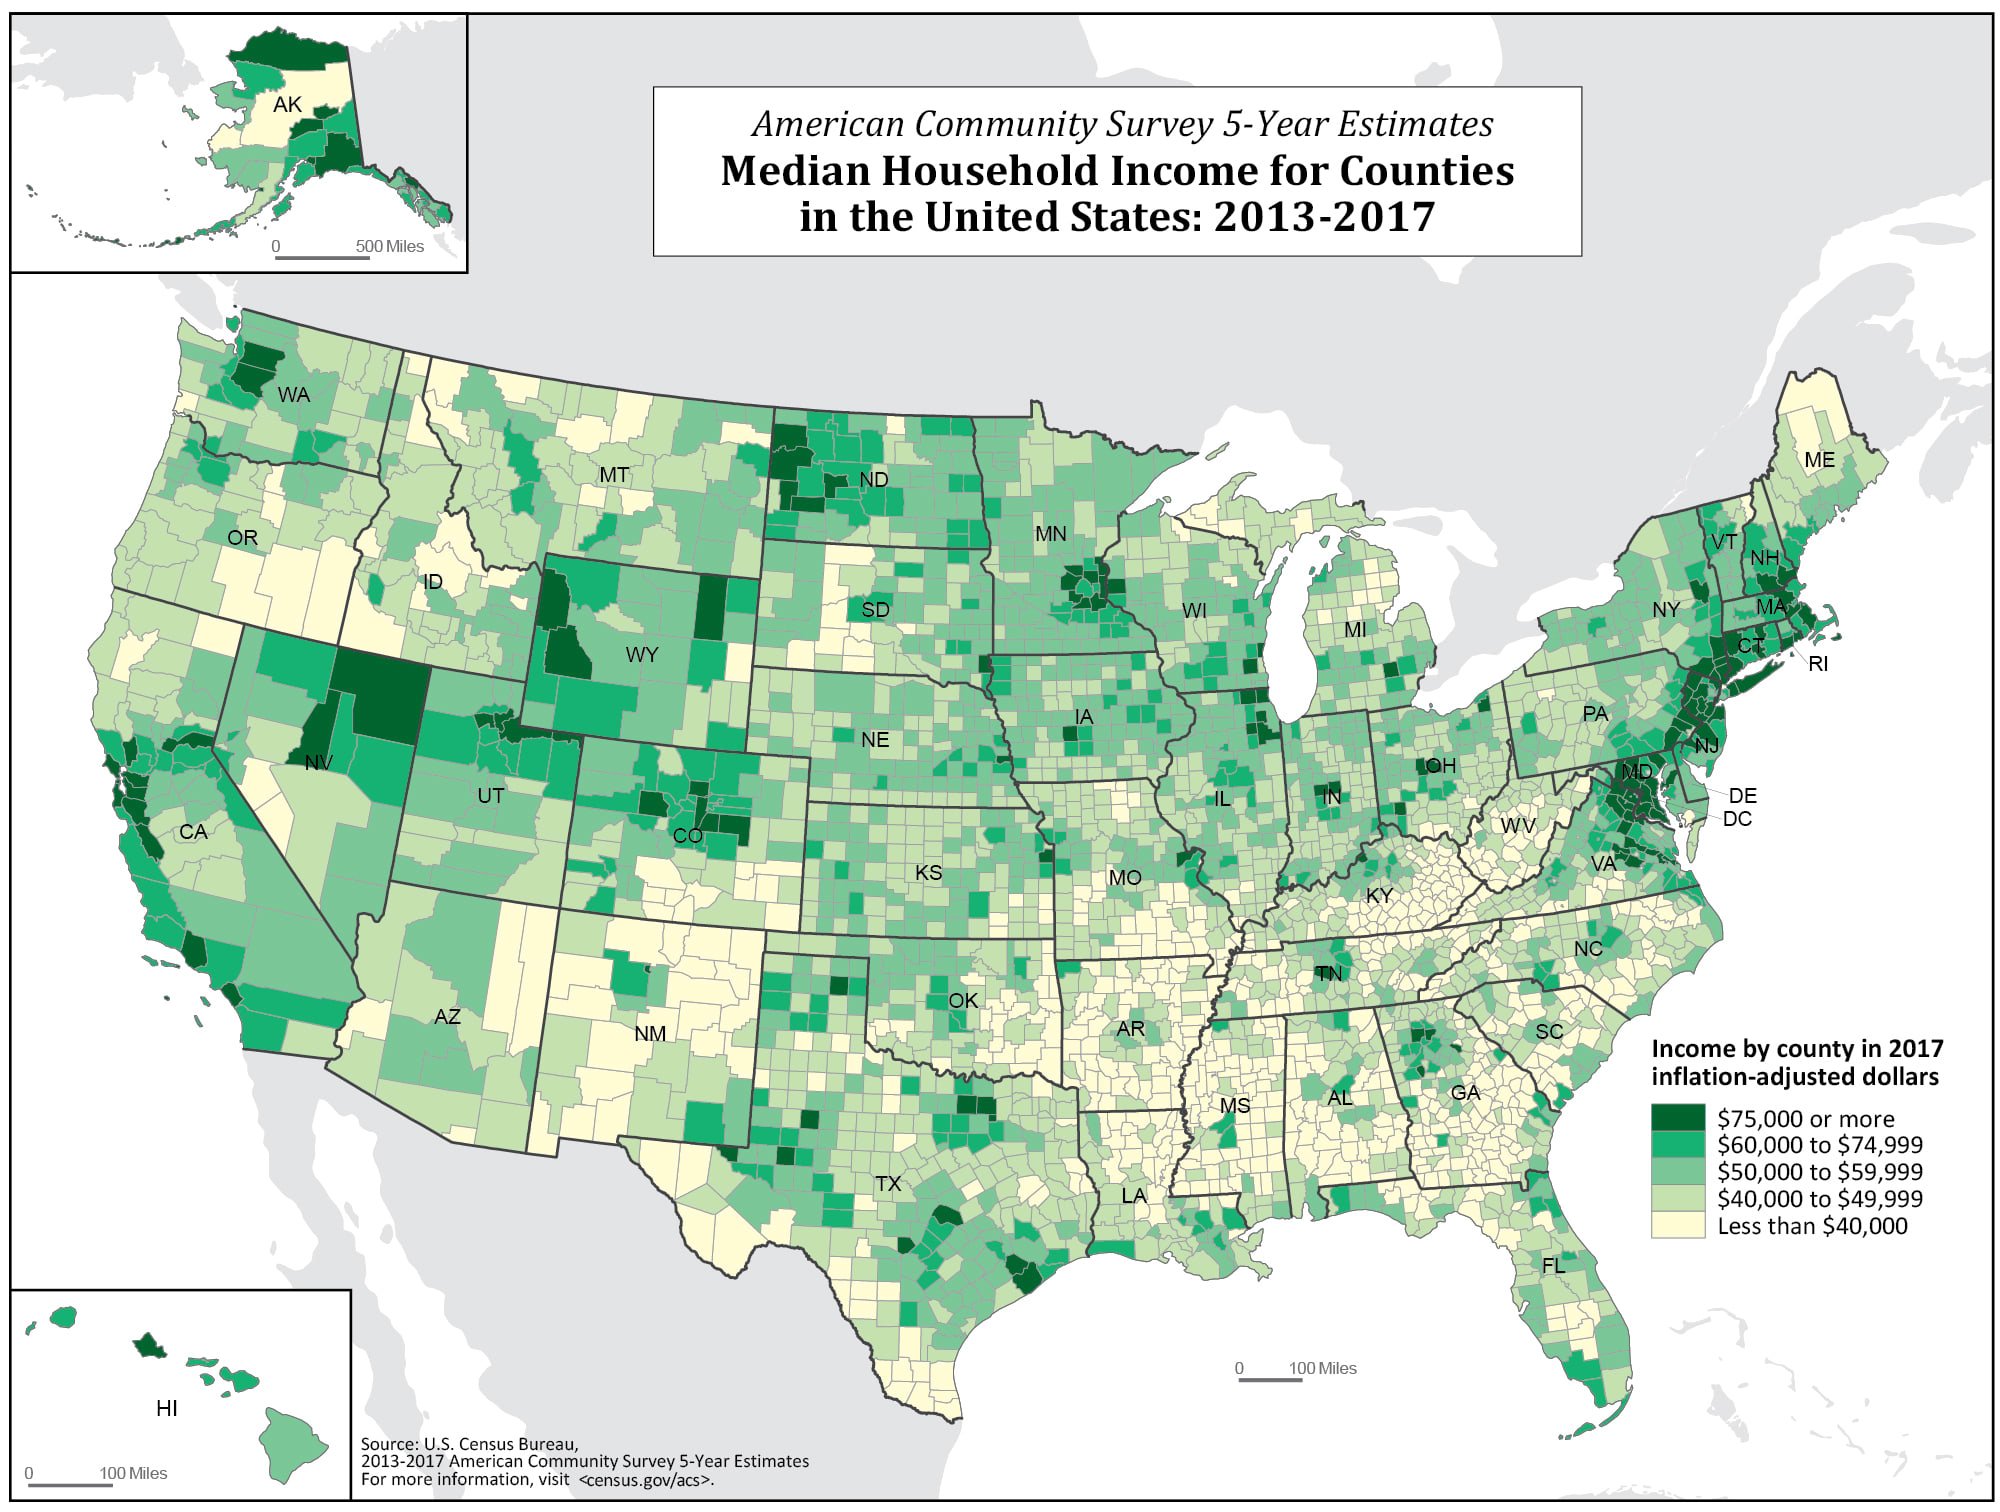

##Problem Conceptualization Details##

**Target Variable :**
In the following code, I will use complex modeling tactics via Python to predict numbers of families who are making under 25,000 dollars annually by zipcode (Y variable). 

**Variables in X :**
This model will incorporate a number of variables that will be determined through the EDA and initial steps of the modeling. The variables that are of highest interest include education, unemployment, race, information about different occupation sectors, healthcare, and age. 

**Business Value :** 
The intent of this project is to determine if and how these variable play a role in predicting income levels by zipcode of the families. This model would help government organizations or social service centers to understand in which area they are most needed. Also, government can launch different schemes for the people living in these areas.  


##Data Import and Preparation##

In [ ]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading all the datasets in one cell 
demo = pd.read_csv('/content/drive/Shareddrives/Python Project 1/Data Files/demo.csv')
econ=pd.read_csv("/content/drive/Shareddrives/Python Project 1/Data Files/econ.csv")
housing=pd.read_csv("/content/drive/Shareddrives/Python Project 1/Data Files/housing.csv")
rural=pd.read_csv("/content/drive/Shareddrives/Python Project 1/Data Files/rural_urban.csv")
social=pd.read_csv("/content/drive/Shareddrives/Python Project 1/Data Files/social.csv")


In [ ]:
#reading dataset of the state and region as per zipcode and renaming zip as zipcode
df_zipstate=pd.read_csv("/content/drive/Shareddrives/Python Project 1/Data Files/uszips (1).csv")
df_region=pd.read_csv("/content/drive/Shareddrives/Python Project 1/Data Files/Regions and Divisions.csv")
df_zipstate.rename(columns={'zip':'zipcode'},inplace=True)
df_zipstate['zipcode'] = df_zipstate['zipcode'].astype(str).str.zfill(5)
df_region.rename(columns={'State Code':'state_id'},inplace = True)

In [ ]:
# updating the ZCTA5 column - converting it into string and adding zeros 
demo['ZCTA5'] = demo['ZCTA5'].astype(str).str.zfill(5)
econ['ZCTA5'] = econ['ZCTA5'].astype(str).str.zfill(5)
housing['ZCTA5'] = housing['ZCTA5'].astype(str).str.zfill(5)
rural['ZCTA5'] = rural['ZCTA5'].astype(str).str.zfill(5)
social['ZCTA5'] = social['ZCTA5'].astype(str).str.zfill(5)


In [ ]:
# renaming the column ZCTA5 as zipcode for clear understanding 
demo.rename(columns={'ZCTA5':'zipcode'},inplace=True)
econ.rename(columns={'ZCTA5':'zipcode'},inplace=True)
housing.rename(columns={'ZCTA5':'zipcode'},inplace=True)
rural.rename(columns={'ZCTA5':'zipcode'},inplace=True)
social.rename(columns={'ZCTA5':'zipcode'},inplace=True)


# Demographics 

In [ ]:
demo.head() # checking data ! 

zipcode  sex_and_age-population-total_population  \
0   00601                                    17800   
1   00602                                    39716   
2   00603                                    51565   
3   00606                                     6320   
4   00610                                    27976   

   sex_and_age-population-male_total_population  \
0                                          8704   
1                                         19509   
2                                         25208   
3                                          3137   
4                                         13528   

   sex_and_age-percent-male-of-total_population  \
0                                         0.489   
1                                         0.491   
2                                         0.489   
3                                         0.496   
4                                         0.484   

   sex_and_age-population-female_total_population  \
0                                            9096   
1                                           20207   
2                                           26357   
3                                            3183   
4                                           14448   

   sex_and_age-percent-female-of-total_population  \
0                                           0.511   
1                                           0.509   
2                                           0.511   
3                                           0.504   
4                                           0.516   

   sex_and_age-population-under_5_years_total_population  \
0                                                937       
1                                               1906       
2                                               2547       
3                                                329       
4                                               1345       

   sex_and_age-percent-under_5_years-of-total_population  \
0                                              0.053       
1                                              0.048       
2                                              0.049       
3                                              0.052       
4                                              0.048       

   sex_and_age-population-5_to_9_years_total_population  \
0                                               1082      
1                                               2464      
2                                               3132      
3                                                287      
4                                               1366      

   sex_and_age-percent-5_to_9_years-of-total_population  \
0                                              0.061      
1                                              0.062      
2                                              0.061      
3                                              0.045      
4                                              0.049      

   sex_and_age-population-10_to_14_years_total_population  \
0                                               1309        
1                                               2186        
2                                               3190        
3                                                400        
4                                               2021        

   sex_and_age-percent-10_to_14_years-of-total_population  \
0                                              0.074        
1                                              0.055        
2                                              0.062        
3                                              0.063        
4                                              0.072        

   sex_and_age-population-15_to_19_years_total_population  \
0                                               1307        
1                                               2830        
2                                               3628        
3              

In [ ]:
demo.shape # actual no. of rows and columns - it has 33120 rows and 153 columns 

(33120, 153)

In [ ]:
list(demo.columns) # checking the name of all the columns in a list 

['zipcode',
 'sex_and_age-population-total_population',
 'sex_and_age-population-male_total_population',
 'sex_and_age-percent-male-of-total_population',
 'sex_and_age-population-female_total_population',
 'sex_and_age-percent-female-of-total_population',
 'sex_and_age-population-under_5_years_total_population',
 'sex_and_age-percent-under_5_years-of-total_population',
 'sex_and_age-population-5_to_9_years_total_population',
 'sex_and_age-percent-5_to_9_years-of-total_population',
 'sex_and_age-population-10_to_14_years_total_population',
 'sex_and_age-percent-10_to_14_years-of-total_population',
 'sex_and_age-population-15_to_19_years_total_population',
 'sex_and_age-percent-15_to_19_years-of-total_population',
 'sex_and_age-population-20_to_24_years_total_population',
 'sex_and_age-percent-20_to_24_years-of-total_population',
 'sex_and_age-population-25_to_34_years_total_population',
 'sex_and_age-percent-25_to_34_years-of-total_population',
 'sex_and_age-population-35_to_44_years_to

In [ ]:
#gruped age into 5 categories
demo['Age_0-14'] = demo['sex_and_age-population-under_5_years_total_population']+demo['sex_and_age-population-5_to_9_years_total_population']+ demo['sex_and_age-population-10_to_14_years_total_population']
demo['Age_15-24'] = demo['sex_and_age-population-15_to_19_years_total_population']+demo['sex_and_age-population-20_to_24_years_total_population']
demo['Age_25-44'] = demo['sex_and_age-population-25_to_34_years_total_population']+demo['sex_and_age-population-35_to_44_years_total_population']
demo['Age_45-64'] = demo['sex_and_age-population-45_to_54_years_total_population']+demo['sex_and_age-population-55_to_59_years_total_population']+demo['sex_and_age-population-60_to_64_years_total_population']
demo['Age_65-95'] = demo['sex_and_age-population-65_to_74_years_total_population']+demo['sex_and_age-population-75_to_84_years_total_population']+demo['sex_and_age-population-85_years_and_over_total_population']


In [ ]:
demo.head() # checking new columns

zipcode  sex_and_age-population-total_population  \
0   00601                                    17800   
1   00602                                    39716   
2   00603                                    51565   
3   00606                                     6320   
4   00610                                    27976   

   sex_and_age-population-male_total_population  \
0                                          8704   
1                                         19509   
2                                         25208   
3                                          3137   
4                                         13528   

   sex_and_age-percent-male-of-total_population  \
0                                         0.489   
1                                         0.491   
2                                         0.489   
3                                         0.496   
4                                         0.484   

   sex_and_age-population-female_total_population  \
0                                            9096   
1                                           20207   
2                                           26357   
3                                            3183   
4                                           14448   

   sex_and_age-percent-female-of-total_population  \
0                                           0.511   
1                                           0.509   
2                                           0.511   
3                                           0.504   
4                                           0.516   

   sex_and_age-population-under_5_years_total_population  \
0                                                937       
1                                               1906       
2                                               2547       
3                                                329       
4                                               1345       

   sex_and_age-percent-under_5_years-of-total_population  \
0                                              0.053       
1                                              0.048       
2                                              0.049       
3                                              0.052       
4                                              0.048       

   sex_and_age-population-5_to_9_years_total_population  \
0                                               1082      
1                                               2464      
2                                               3132      
3                                                287      
4                                               1366      

   sex_and_age-percent-5_to_9_years-of-total_population  \
0                                              0.061      
1                                              0.062      
2                                              0.061      
3                                              0.045      
4                                              0.049      

   sex_and_age-population-10_to_14_years_total_population  \
0                                               1309        
1                                               2186        
2                                               3190        
3                                                400        
4                                               2021        

   sex_and_age-percent-10_to_14_years-of-total_population  \
0                                              0.074        
1                                              0.055        
2                                              0.062        
3                                              0.063        
4                                              0.072        

   sex_and_age-population-15_to_19_years_total_population  \
0                                               1307        
1                                               2830        
2                                               3628        
3              

In [ ]:
demo.shape

(33120, 158)

In [ ]:
#dropping variables which we used to form age categories
demo.drop(['sex_and_age-population-under_5_years_total_population','sex_and_age-population-5_to_9_years_total_population','sex_and_age-population-10_to_14_years_total_population','sex_and_age-population-15_to_19_years_total_population','sex_and_age-population-20_to_24_years_total_population','sex_and_age-population-25_to_34_years_total_population','sex_and_age-population-35_to_44_years_total_population','sex_and_age-population-45_to_54_years_total_population','sex_and_age-population-55_to_59_years_total_population','sex_and_age-population-60_to_64_years_total_population','sex_and_age-population-65_to_74_years_total_population','sex_and_age-population-75_to_84_years_total_population','sex_and_age-population-85_years_and_over_total_population',],axis=1,inplace=True)

In [ ]:
demo.shape # checking the new shape now as he dropped 13 variables and made new grouped columns out of it 

(33120, 145)

In [ ]:
# Cleaned Population data 
# dropping percentage variables as our target variable is a count so we don't need percentages 
demo.drop(['sex_and_age-percent-male-of-total_population','sex_and_age-percent-female-of-total_population','sex_and_age-population-18_years_and_over_total_population',
 'sex_and_age-percent-18_years_and_over-of-total_population',
 'sex_and_age-population-21_years_and_over_total_population',
 'sex_and_age-percent-21_years_and_over-of-total_population',
 'sex_and_age-population-62_years_and_over_total_population',
 'sex_and_age-percent-62_years_and_over-of-total_population',
 'sex_and_age-population-65_years_and_over_total_population',
 'sex_and_age-percent-65_years_and_over-of-total_population',
 'sex_and_age-percent-male-of-18_years_and_over_population',
 'sex_and_age-percent-female-of-18_years_and_over_population',
 'sex_and_age-percent-male-of-65_years_and_over_population',
 'sex_and_age-percent-female-of-65_years_and_over_population',
 'sex_and_age-percent-under_5_years-of-total_population',
 'sex_and_age-percent-5_to_9_years-of-total_population',
 'sex_and_age-percent-10_to_14_years-of-total_population',
 'sex_and_age-percent-15_to_19_years-of-total_population',
 'sex_and_age-percent-20_to_24_years-of-total_population',
 'sex_and_age-percent-25_to_34_years-of-total_population',
 'sex_and_age-percent-35_to_44_years-of-total_population',
 'sex_and_age-percent-45_to_54_years-of-total_population',
 'sex_and_age-percent-55_to_59_years-of-total_population',
 'sex_and_age-percent-60_to_64_years-of-total_population',
 'sex_and_age-percent-65_to_74_years-of-total_population',
 'sex_and_age-percent-75_to_84_years-of-total_population'
,'sex_and_age-percent-85_years_and_over-of-total_population'],axis=1,inplace = True)

In [ ]:
demo.shape # checking the new shape as we dropped 

(33120, 118)

In [ ]:
# Cleaning Race data from Demo table 
# droppped off variables of Race which has percentages as we are including the numbers therefore they are repeative 
demo.drop(['race-population-total_population',
           'race-percent-one_race-of-total_population','race-percent-two_or_more_races-of-total_population',
           'race-percent-one_race_white-of-total_population',
           'race-percent-one_race_black-of-total_population',
 'race-percent-one_race_american_indian_and_alaska_native-of-total_population',
 'race_detailed-percent-one_race_american_indian_and_alaska_native_cherokee_tribal_grouping-of-total_population',
 'race_detailed-percent-one_race_american_indian_and_alaska_native_chippewa_tribal_grouping-of-total_population',
 'race_detailed-percent-one_race_american_indian_and_alaska_native_navajo_tribal_grouping-of-total_population',
 'race_detailed-percent-one_race_american_indian_and_alaska_native_sioux_tribal_grouping-of-total_population',
 'race-percent-one_race_asian-of-total_population',
 'race_detailed-percent-one_race_asian_indian-of-total_population',
 'race_detailed-percent-one_race_asian_chinese-of-total_population',
 'race_detailed-percent-one_race_asian_filipino-of-total_population',
 'race_detailed-percent-one_race_asian_japanese-of-total_population',
 'race_detailed-percent-one_race_asian_korean-of-total_population',
 'race_detailed-percent-one_race_asian_vietnamese-of-total_population',
 'race_detailed-percent-one_race_asian_other-of-total_population',
 'race-percent-one_race_native_hawaiian_and_other_pacific_islander-of-total_population',
 'race_detailed-percent-one_race_native_hawaiian_and_other_pacific_islander_native_hawaiian-of-total_population',
 'race_detailed-percent-one_race_native_hawaiian_and_other_pacific_islander_guamanian_or_chamorro-of-total_population',
 'race_detailed-percent-one_race_native_hawaiian_and_other_pacific_islander_samoan-of-total_population',
 'race_detailed-percent-one_race_native_hawaiian_and_other_pacific_islander_other_pacific_islander-of-total_population',
 'race_detailed-percent-two_or_more_races-white_and_black-of-total_population',
 'race_detailed-percent-two_or_more_races-white_and_american_indian_and_alaska_native-of-total_population',
 'race_detailed-percent-two_or_more_races-white_and_asian-of-total_population',
 'race_detailed-percent-two_or_more_races-black_and_american_indian_and_alaska_native-of-total_population',
 'race_detailed-percent-race_alone_or_in_combination_with_one_or_more_other_races_white-of-total_population',
 'race_detailed-percent-race_alone_or_in_combination_with_one_or_more_other_races_black-of-total_population',
 'race_detailed-percent-race_alone_or_in_combination_with_one_or_more_other_races_american_indian_and_alaska_native-of-total_population',
 'race_detailed-percent-race_alone_or_in_combination_with_one_or_more_other_races_asian-of-total_population',
 'race_detailed-percent-race_alone_or_in_combination_with_one_or_more_other_races_native_hawaiian_and_other_pacific_islander-of-total_population',
 'race_detailed-percent-race_alone_or_in_combination_with_one_or_more_other_races_other-of-total_population',
 'race-percent-one_race_other-of-total_population',
 'hispanic_or_latino_and_race-percent-hispanic_or_latino_of_any_race-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-hispanic_or_latino_of_any_race_mexican-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-hispanic_or_latino_of_any_race_puerto_rican-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-hispanic_or_latino_of_any_race_cuban-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-hispanic_or_latino_of_any_race_other-of-total_population',
 'hispanic_or_latino_and_race-percent-not_hispanic_or_latino-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_white-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_black-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_american_indian_and_alaska_native-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_asian-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_native_hawaiian_and_other_pacific_islander-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_other-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_two_or_more_races-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_two_or_more_races_including_some_other_race-of-total_population',
 'hispanic_or_latino_and_race_detailed-percent-not_hispanic_or_latino_two_or_more_races_excluding_some_other_race_and_three_or_more_races-of-total_population',
 'citizen_voting_age_population-percent-male-of-citizen_18_and_over_population',
 'citizen_voting_age_population-percent-female-of-citizen_18_and_over_population'],axis=1,inplace= True)

In [ ]:
demo.shape # checking the new shape of the dataste as we dropped off 51 percentage variables

(33120, 67)

In [ ]:
demo.head() # checking data

zipcode  sex_and_age-population-total_population  \
0   00601                                    17800   
1   00602                                    39716   
2   00603                                    51565   
3   00606                                     6320   
4   00610                                    27976   

   sex_and_age-population-male_total_population  \
0                                          8704   
1                                         19509   
2                                         25208   
3                                          3137   
4                                         13528   

   sex_and_age-population-female_total_population  \
0                                            9096   
1                                           20207   
2                                           26357   
3                                            3183   
4                                           14448   

   sex_and_age-age-median_age_years_total_population  \
0                                               38.6   
1                                               40.0   
2                                               40.0   
3                                               42.4   
4                                               40.6   

   sex_and_age-population-male_18_years_and_over_population  \
0                                               6597          
1                                              15293          
2                                              19398          
3                                               2446          
4                                              10458          

   sex_and_age-population-female_18_years_and_over_population  \
0                                               7073            
1                                              16190            
2                                              21175            
3                                               2592            
4                                              11576            

   sex_and_age-population-male_65_years_and_over_population  \
0                                               1298          
1                                               2859          
2                                               4276          
3                                                520          
4                                               2229          

   sex_and_age-population-female_65_years_and_over_population  \
0                                               1516            
1                                               3260            
2                                               5082            
3                                                552            
4                                               2729            

   race-population-one_race_total_population  \
0                                      17611   
1                                      25527   
2                                      44690   
3                                       6160   
4                                      24182   

   race-population-two_or_more_races_total_population  \
0                                                189    
1                                              14189    
2                                               6875    
3                                                160    
4                                               3794    

   race-population-one_race_white_total_population  \
0                                            14436   
1                                            22941   
2                                            35176   
3                                             3739   
4                                            16259   

   race-population-one_race_black_total_population  \
0                                              108   
1                                              968   
2                                             2149   
3

In [ ]:
# checking if two variables are same or not. if it is same then we can drop one. 
(demo['hispanic_or_latino_and_race-population-total_population'] == demo['sex_and_age-population-total_population']).unique()

# They are same 

array([ True])

In [ ]:
# dropping off variables which are not useful as some data is already present in other columns and few subset of the two race population is missing
demo.drop([
 'race_detailed-population-race_alone_or_in_combination_with_one_or_more_other_races_white_total_population',
 'race_detailed-population-race_alone_or_in_combination_with_one_or_more_other_races_black_total_population',
 'race_detailed-population-race_alone_or_in_combination_with_one_or_more_other_races_american_indian_and_alaska_native_total_population',
 'race_detailed-population-race_alone_or_in_combination_with_one_or_more_other_races_asian_total_population',
 'race_detailed-population-race_alone_or_in_combination_with_one_or_more_other_races_native_hawaiian_and_other_pacific_islander_total_population',
 'race_detailed-population-race_alone_or_in_combination_with_one_or_more_other_races_other_total_population',
 'hispanic_or_latino_and_race-population-total_population',
 'hispanic_or_latino_and_race-population-not_hispanic_or_latino_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_white_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_black_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_american_indian_and_alaska_native_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_asian_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_native_hawaiian_and_other_pacific_islander_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_other_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_two_or_more_races_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_two_or_more_races_including_some_other_race_total_population',
 'hispanic_or_latino_and_race_detailed-population-not_hispanic_or_latino_two_or_more_races_excluding_some_other_race_and_three_or_more_races_total_population'],axis =1, inplace = True)

In [ ]:
demo.shape # checking shape after dropping more variables 

(33120, 50)

In [ ]:
demo.head() # checking new data and understanding which columns to keep 

zipcode  sex_and_age-population-total_population  \
0   00601                                    17800   
1   00602                                    39716   
2   00603                                    51565   
3   00606                                     6320   
4   00610                                    27976   

   sex_and_age-population-male_total_population  \
0                                          8704   
1                                         19509   
2                                         25208   
3                                          3137   
4                                         13528   

   sex_and_age-population-female_total_population  \
0                                            9096   
1                                           20207   
2                                           26357   
3                                            3183   
4                                           14448   

   sex_and_age-age-median_age_years_total_population  \
0                                               38.6   
1                                               40.0   
2                                               40.0   
3                                               42.4   
4                                               40.6   

   sex_and_age-population-male_18_years_and_over_population  \
0                                               6597          
1                                              15293          
2                                              19398          
3                                               2446          
4                                              10458          

   sex_and_age-population-female_18_years_and_over_population  \
0                                               7073            
1                                              16190            
2                                              21175            
3                                               2592            
4                                              11576            

   sex_and_age-population-male_65_years_and_over_population  \
0                                               1298          
1                                               2859          
2                                               4276          
3                                                520          
4                                               2229          

   sex_and_age-population-female_65_years_and_over_population  \
0                                               1516            
1                                               3260            
2                                               5082            
3                                                552            
4                                               2729            

   race-population-one_race_total_population  \
0                                      17611   
1                                      25527   
2                                      44690   
3                                       6160   
4                                      24182   

   race-population-two_or_more_races_total_population  \
0                                                189    
1                                              14189    
2                                               6875    
3                                                160    
4                                               3794    

   race-population-one_race_white_total_population  \
0                                            14436   
1                                            22941   
2                                            35176   
3                                             3739   
4                                            16259   

   race-population-one_race_black_total_population  \
0                                              108   
1                                              968   
2                                             2149   
3

In [ ]:
# dropped off voting data as we already have voting data in other columns that is male over 18 and female over 18 and even numbers are same 
demo.drop(['citizen_voting_age_population-population-citizen_18_and_over_population',
 'citizen_voting_age_population-population-male_citizen_18_and_over_population',
 'citizen_voting_age_population-population-female_citizen_18_and_over_population'],axis=1,inplace=True)

In [ ]:
# clean data after dropping 106 columns which were repeative and had missing values. 
demo.shape

(33120, 47)

In [ ]:
# checking data types 
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 47 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   zipcode                                                                                                               33120 non-null  object 
 1   sex_and_age-population-total_population                                                                               33120 non-null  int64  
 2   sex_and_age-population-male_total_population                                                                          33120 non-null  int64  
 3   sex_and_age-population-female_total_population                                                                        33120 non-null  int64  
 4   sex_

In [ ]:
#missing values - only 1 column has missing values ! Median Age has 525 missing values 
demo.isnull().sum()

zipcode                                                                                                                   0
sex_and_age-population-total_population                                                                                   0
sex_and_age-population-male_total_population                                                                              0
sex_and_age-population-female_total_population                                                                            0
sex_and_age-age-median_age_years_total_population                                                                       525
sex_and_age-population-male_18_years_and_over_population                                                                  0
sex_and_age-population-female_18_years_and_over_population                                                                0
sex_and_age-population-male_65_years_and_over_population                                                                  0
sex_and_

In [ ]:
# dropping variable with missing values
demo.drop(['sex_and_age-age-median_age_years_total_population'],axis=1,inplace = True)

In [ ]:
demo.shape # final shape of the demo table-----------------------------

(33120, 46)

# Social

In [ ]:
social.head() # checking data 

zipcode  households_by_type-total_households  \
0   01001                                 7190   
1   01002                                 9561   
2   01003                                   26   
3   01005                                 1840   
4   01007                                 5611   

   households_by_type-households-family_households  \
0                                             3943   
1                                             4626   
2                                                0   
3                                             1150   
4                                             4010   

   households_by_type-percent-family_households-of-total_households  \
0                                              0.548                  
1                                              0.484                  
2                                              0.000                  
3                                              0.625                  
4                                              0.715                  

   households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years  \
0                                               1406                                                     
1                                               2068                                                     
2                                                  0                                                     
3                                                462                                                     
4                                               1882                                                     

   households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households  \
0                                              0.196                                                                      
1                                              0.216                                                                      
2                                              0.000                                                                      
3                                              0.251                                                                      
4                                              0.335                                                                      

   households_by_type-households-married_couple_family_households  \
0                                               3096                
1                                               3463                
2                                                  0                
3                                                962                
4                                               3275                

   households_by_type-percent-married_couple_familiy_households-of-total_households  \
0                                              0.431                                  
1                                              0.362                                  
2                                              0.000                                  
3                                              0.523                                  
4                                              0.584                                  

   households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years  \
0                                               1017                                                                    
1                                               1352                                                                    
2                                                  0                                                                    
3                                                344                                                                    
4                             

In [ ]:
social.shape # checking the shape of the data - 33120 rows and 252 columns 

(33120, 252)

In [ ]:
list(social.columns) # checking the name of all the columns in social dataset for understanding data 

['zipcode',
 'households_by_type-total_households',
 'households_by_type-households-family_households',
 'households_by_type-percent-family_households-of-total_households',
 'households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years',
 'households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households',
 'households_by_type-households-married_couple_family_households',
 'households_by_type-percent-married_couple_familiy_households-of-total_households',
 'households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years',
 'households_by_type-percent-married_couple_family_households_with_own_children_of_the_householder_under_18_years-of-total_households',
 'households_by_type-households-male_householder_no_wife_present_family_households',
 'households_by_type-percent-male_householder_no_wife_present_family_households-of-total_households',
 'househ

In [ ]:
#dropping off precent columns from Social table as we are using count variables  
social.drop(['households_by_type-percent-family_households-of-total_households',
 'households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households',
 'households_by_type-percent-married_couple_familiy_households-of-total_households',
 'households_by_type-percent-married_couple_family_households_with_own_children_of_the_householder_under_18_years-of-total_households',
 'households_by_type-percent-male_householder_no_wife_present_family_households-of-total_households',
 'households_by_type-percent-male_householder_no_wife_present_family_households_with_own_children_of_the_householder_under_18_years-of-total_households',
 'households_by_type-percent-female_householder_no_husband_present_family_households-of-total_households',
 'households_by_type-percent-female_householder_no_husband_present_family_households_with_own_children_of_the_householder_under_18_years-of-total_households',
 'households_by_type-percent-nonfamily_households-of-total_households',
 'households_by_type-percent-householder_living_alone-of-total_households',
 'households_by_type-percent-householder_living_alone_65_years_and_over-of-total_households',
 'households_by_type-percent-households_with_one_or_more_people_under_18_years-of-total_households',
 'households_by_type-percent-households_with_one_or_more_people_65_years_and_over-of-total_households',
 'relationship-percent-householder-of-population_in_households',
 'relationship-percent-spouse-of-population_in_households',
 'relationship-percent-child-of-population_in_households',
 'relationship-percent-other_relatives-of-population_in_households',
 'relationship-percent-nonrelatives-of-population_in_households',
 'relationship-percent-nonrelatives_unmarried_partner-of-population_in_households',
 'marital_status-percent-never_married-of-males_15_years_and_over',
 'marital_status-percent-now_married_except_separated-of-males_15_years_and_over',
 'marital_status-percent-separated-of-males_15_years_and_over',
 'marital_status-percent-widowed-of-males_15_years_and_over',
 'marital_status-percent-divorced-of-males_15_years_and_over',
 'marital_status-percent-never_married-of-females_15_years_and_over',
 'marital_status-percent-now_married_except_separated-of-females_15_years_and_over',
 'marital_status-percent-separated-of-females_15_years_and_over',
 'marital_status-percent-widowed-of-females_15_years_and_over',
 'marital_status-percent-divorced-of-females_15_years_and_over',
 'fertility-percent-unmarried_women_widowed_divorced_or_never_married-of-number_of_women_15_to_50_years_old_who_had_a_birth_in_the_past_12_months',
 'grandparents-percent-grandparents_responsible_for_grandchildren-of-grandparents_living_with_own_grandchildren_under_18_years',
 'grandparents-percent-responsible_for_grandchildren_less_than_1_year-of-grandparents_living_with_own_grandchildren_under_18_years',
 'grandparents-percent-responsible_for_grandchildren_1_to_2_years-of-grandparents_living_with_own_grandchildren_under_18_years',
 'grandparents-percent-responsible_for_grandchildren_3_or_4_years-of-grandparents_living_with_own_grandchildren_under_18_years',
 'grandparents-percent-responsible_for_grandchildren_5_or_more_years-of-grandparents_living_with_own_grandchildren_under_18_years',
 'grandparents-percent-female-of-grandparents_responsible_for_own_grandchildren_under_18_years',
 'grandparents-percent-married-of-grandparents_responsible_for_own_grandchildren_under_18_years',
 'school_enrollment-percent-nursery_school_preschool-of-population_3_years_and_over_enrolled_in_school',
 'school_enrollment-percent-kindergarten-of-population_3_years_and_over_enrolled_in_school',
 'school_enrollment-percent-elementary_school_grades_1_to_8-of-population_3_years_and_over_enrolled_in_school',
 'school_enrollment-percent-high_school_grades_9_to_12-of-population_3_years_and_over_enrolled_in_school',
 'school_enrollment-percent-college_or_graduate_school-of-population_3_years_and_over_enrolled_in_school',
 'educational_attainment-percent-less_than_9th_grade-of-population_25_years_and_over',
 'educational_attainment-percent-9th_to_12th_grade_no_diploma-of-population_25_years_and_over',
 'educational_attainment-percent-high_school_graduate_includes_equivalency-of-population_25_years_and_over',
 'educational_attainment-percent-some_college_no_degree-of-population_25_years_and_over',
 'educational_attainment-percent-associates_degree-of-population_25_years_and_over',
 'educational_attainment-percent-bachelors_degree-of-population_25_years_and_over',
 'educational_attainment-percent-graduate_or_professional_degree-of-population_25_years_and_over',
 'educational_attainment-percent-high_school_graduate_or_higher-of-population_25_years_and_over',
 'educational_attainment-percent-bachelors_degree_or_higher-of-population_25_years_and_over',
 'veteran_status-percent-civilian_veterans-of-civilian_population_18_years_and_over',
 'residence_1_year_ago-percent-same_house-of-population_1_year_and_over',
 'residence_1_year_ago-percent-diff_house-of-population_1_year_and_over',
 'residence_1_year_ago-percent-abroad-of-population_1_year_and_over',
 'place_of_birth-percent-born_native-of-total_population',
 'place_of_birth-percent-born_in_usa_or_pr_if_zip_is_pr-of-total_population',
 'place_of_birth-percent-born_native_same_state_as_residence-of-total_population',
 'place_of_birth-percent-born_native_diff_state_as_residence-of-total_population',
 'place_of_birth-percent-born_abroad_incl_pr_if_zip_is_usa-of-total_population',
 'place_of_birth-percent-foreign_born-of-total_population',
 'language_spoken_at_home-percent-english_only-of-population_5_years_and_over',
 'language_spoken_at_home-percent-language_other_than_english-of-population_5_years_and_over',
 'language_spoken_at_home-percent-language_other_than_english_speak_english_less_than_very_well-of-population_5_years_and_over',
 'language_spoken_at_home-percent-spanish-of-population_5_years_and_over',
 'language_spoken_at_home-percent-spanish_speak_english_less_than_very_well-of-population_5_years_and_over',
 'language_spoken_at_home-percent-other_indo_european_languages-of-population_5_years_and_over',
 'language_spoken_at_home-percent-other_indo_european_languages_speak_english_less_than_very_well-of-population_5_years_and_over',
 'language_spoken_at_home-percent-asian_and_pacific_islander_languages-of-population_5_years_and_over',
 'language_spoken_at_home-percent-asian_and_pacific_islander_languages_speak_english_less_than_very_well-of-population_5_years_and_over',
 'language_spoken_at_home-percent-other_languages-of-population_5_years_and_over',
 'ancestry-percent-american-of-total_population',
 'ancestry-percent-arab-of-total_population',
 'ancestry-percent-czech-of-total_population',
 'ancestry-percent-danish-of-total_population',
 'ancestry-percent-dutch-of-total_population',
 'ancestry-percent-english-of-total_population',
 'ancestry-percent-french_except_basque-of-total_population',
 'ancestry-percent-french_canadian-of-total_population',
 'ancestry-percent-german-of-total_population',
 'ancestry-percent-greek-of-total_population',
 'ancestry-percent-hungarian-of-total_population',
 'ancestry-percent-irish-of-total_population',
 'ancestry-percent-italian-of-total_population',
 'ancestry-percent-lithuanian-of-total_population',
 'ancestry-percent-norwegian-of-total_population',
 'ancestry-percent-polish-of-total_population',
 'ancestry-percent-portuguese-of-total_population',
 'ancestry-percent-russian-of-total_population',
 'ancestry-percent-scotch-of-total_population-irish',
 'ancestry-percent-scottish-of-total_population',
 'ancestry-percent-slovak-of-total_population',
 'ancestry-percent-subsaharan_african-of-total_population',
 'ancestry-percent-swedish-of-total_population',
 'ancestry-percent-swiss-of-total_population',
 'ancestry-percent-ukrainian-of-total_population',
 'ancestry-percent-welsh-of-total_population',
 'ancestry-percent-west_indian_excluding_hispanic_origin_groups-of-total_population',
 'disability_status_of_the_civilian_noninstitutionalized_population-percent-with_a_disability-of-total_civilian_noninstitutionalized_population',
 'disability_status_of_the_civilian_noninstitutionalized_population-percent-with_a_disability-of-under_18_years',
 'disability_status_of_the_civilian_noninstitutionalized_population-percent-with_a_disability-of-18_to_64_years',
 'disability_status_of_the_civilian_noninstitutionalized_population-percent-with_a_disability-of-65_years_and_over'],axis=1, inplace = True)

In [ ]:
social.shape # dropped off 98 columns (percent columns)

(33120, 150)

In [ ]:
social.head() # checking data after dropping percentage columns 

zipcode  households_by_type-total_households  \
0   01001                                 7190   
1   01002                                 9561   
2   01003                                   26   
3   01005                                 1840   
4   01007                                 5611   

   households_by_type-households-family_households  \
0                                             3943   
1                                             4626   
2                                                0   
3                                             1150   
4                                             4010   

   households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years  \
0                                               1406                                                     
1                                               2068                                                     
2                                                  0                                                     
3                                                462                                                     
4                                               1882                                                     

   households_by_type-households-married_couple_family_households  \
0                                               3096                
1                                               3463                
2                                                  0                
3                                                962                
4                                               3275                

   households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years  \
0                                               1017                                                                    
1                                               1352                                                                    
2                                                  0                                                                    
3                                                344                                                                    
4                                               1462                                                                    

   households_by_type-households-male_householder_no_wife_present_family_households  \
0                                                195                                  
1                                                266                                  
2                                                  0                                  
3                                                 92                                  
4                                                233                                  

   households_by_type-households-male_householder_no_wife_present_family_households_with_own_children_of_the_householder_under_18_years  \
0                                                 94                                                                                      
1                                                131                                                                                      
2                                                  0                                                                                      
3                                                 77                                                                                      
4                                                 90                                                                                      

   households_by_type-households-female_householder_no_husband_present_family_households  \
0                                                652                                       
1                                                897   

In [ ]:
list(social.columns) # checking the list of columns which are left now

['zipcode',
 'households_by_type-total_households',
 'households_by_type-households-family_households',
 'households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years',
 'households_by_type-households-married_couple_family_households',
 'households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years',
 'households_by_type-households-male_householder_no_wife_present_family_households',
 'households_by_type-households-male_householder_no_wife_present_family_households_with_own_children_of_the_householder_under_18_years',
 'households_by_type-households-female_householder_no_husband_present_family_households',
 'households_by_type-households-female_householder_no_husband_present_family_households_with_own_children_of_the_householder_under_18_years',
 'households_by_type-households-nonfamily_households',
 'households_by_type-households-householder_living_alone_households',
 'households_by_type-househ

In [ ]:
pd.set_option('display.max_rows', None)
social.isnull().sum() # checking missing values 
# it seems that computer_and_internet columns has all values missing 

zipcode                                                                                                                                              0
households_by_type-total_households                                                                                                                  0
households_by_type-households-family_households                                                                                                      0
households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years                                                  0
households_by_type-households-married_couple_family_households                                                                                       0
households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years                                   0
households_by_type-households-male_householder_no_wife_present_family_households              

In [ ]:
# checking unique values 
social['computers_and_internet_use-percent-with_a_broadband_internet_subscription-of-total_households'].unique()
# All values are 0 

array([0])

In [ ]:
#checking unique values 
social['computers_and_internet_use-percent-with_a_computer-of-total_households'].unique() 
# There is only one value that is 0 of this variable

array([0])

In [ ]:
#dropping off computer_internet variables as they have all missing values 
#dropping off fertility_population and us_citizenship variables as the data was missing. droppped off languages_spoken data, place of birth data, ancestor data, marital data and relationship data (dropped off 56 variables)
social.drop(['computers_and_internet_use-households-total_households',
 'computers_and_internet_use-households-with_a_computer_total_households',
 'computers_and_internet_use-percent-with_a_computer-of-total_households',
 'computers_and_internet_use-households-with_a_broadband_internet_subscription_total_households',
 'computers_and_internet_use-percent-with_a_broadband_internet_subscription-of-total_households',
 'fertility-population-women_15_to_50_years_old_who_had_a_birth_in_the_past_12_months',
 'fertility-population-unmarried_women_15_to_50_years_old_who_had_a_birth_in_the_past_12_months',
 'fertility-population-unmarried_women_15_to_50_years_old_who_had_a_birth_in_the_past_12_months_per_1000_unmarried_women',
 'fertility-population-15_to_50_years_old_women_who_had_a_birth_in_the_past_12_months_per_1000_15_to_50_years_old_women',
 'fertility-population-15_to_19_years_old_women_who_had_a_birth_in_the_past_12_months_per_1000_15_to_50_years_old_women',
 'fertility-population-20_to_34_years_old_women_who_had_a_birth_in_the_past_12_months_per_1000_15_to_50_years_old_women',
 'fertility-population-35_to_50_years_old_women_who_had_a_birth_in_the_past_12_months_per_1000_15_to_50_years_old_women',
 'residence_1_year_ago-population-population_1_year_and_over',
 'residence_1_year_ago-population-same_house_population_1_year_and_over',
 'residence_1_year_ago-population-diff_house_population_1_year_and_over',
 'residence_1_year_ago-population-abroad_population_1_year_and_over',
 'language_spoken_at_home-population-population_5_years_and_over',
 'language_spoken_at_home-population-english_only_population_5_years_and_over',
 'language_spoken_at_home-population-language_other_than_english_population_5_years_and_over',
 'language_spoken_at_home-population-language_other_than_english_speak_english_less_than_very_well_population_5_years_and_over',
 'language_spoken_at_home-population-spanish_population_5_years_and_over',
 'language_spoken_at_home-population-spanish_speak_english_less_than_very_well_population_5_years_and_over',
 'language_spoken_at_home-population-other_indo_european_languages_population_5_years_and_over',
 'language_spoken_at_home-population-other_indo_european_languages_speak_english_less_than_very_well_population_5_years_and_over',
 'language_spoken_at_home-population-asian_and_pacific_islander_languages_population_5_years_and_over',
 'language_spoken_at_home-population-asian_and_pacific_islander_languages_speak_english_less_than_very_well-population_5_years_and_over',
 'language_spoken_at_home-population-other_languages_population_5_years_and_over',
 'language_spoken_at_home-population-other_languages_speak_english_less_than_very_well-population_5_years_and_over',
 'language_spoken_at_home-percent-other_languages_speak_english_less_than_very_well-of-population_5_years_and_over',
 'world_region_of_birth_of_foreign_born-population-foreign_born_population_excluding_born_at_sea',
 'world_region_of_birth_of_foreign_born-population-foreign_europe_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-percent-foreign_europe_born-of-foreign_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-population-foreign_asia_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-percent-foreign_asia_born-of-foreign_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-population-foreign_africa_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-percent-foreign_africa_born-of-foreign_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-population-foreign_oceania_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-percent-foreign_oceania_born-of-foreign_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-population-foreign_latin_america_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-percent-foreign_latin_america_born-of-foreign_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-population-foreign_northern_america_born_population_excluding_population_born_at_sea',
 'world_region_of_birth_of_foreign_born-percent-foreign_northern_america_born-of-foreign_born_population_excluding_population_born_at_sea',
 'place_of_birth-population-total_population',
 'place_of_birth-population-born_native_total_population',
 'place_of_birth-population-born_in_usa_or_pr_if_zip_is_pr_total_population',
 'place_of_birth-population-born_native_same_state_as_residence_total_population',
 'place_of_birth-population-born_native_diff_state_as_residence_total_population',
 'place_of_birth-population-born_abroad_incl_pr_if_zip_is_usa_total_population',
 'place_of_birth-population-foreign_born_total_population',
 'relationship-population_in_households',
 'relationship-population-householder',
 'relationship-population-spouse',
 'relationship-population-child',
 'relationship-population-other_relatives',
 'relationship-population-nonrelatives',
 'relationship-population-nonrelatives_unmarried_partner',
 'marital_status-population_males_15_years_and_over',
 'marital_status-population-never_married_males_15_years_and_over',
 'marital_status-population-now_married_except_separated_males_15_years_and_over',
 'marital_status-population-separated_males_15_years_and_over',
 'marital_status-population-widowed_males_15_years_and_over',
 'marital_status-population-divorced_males_15_years_and_over',
 'marital_status-population_females_15_years_and_over',
 'marital_status-population-never_married_females_15_years_and_over',
 'marital_status-population-now_married_except_separated_females_15_years_and_over',
 'marital_status-population-separated_females_15_years_and_over',
 'marital_status-population-widowed_females_15_years_and_over',
 'marital_status-population-divorced_females_15_years_and_over',
 'us_citizenship_status-population-naturalized_us_citizen-of-foreign_born_population',
 'us_citizenship_status-population-not_us_citizen-of-foreign_born_population',
 'ancestry-population-total_population',
 'ancestry-population-american_total_population',
 'ancestry-population-arab_total_population',
 'ancestry-population-czech_total_population',
 'ancestry-population-danish_total_population',
 'ancestry-population-dutch_total_population',
 'ancestry-population-english_total_population',
 'ancestry-population-french_except_basque_total_population',
 'ancestry-population-french_canadian_total_population',
 'ancestry-population-german_total_population',
 'ancestry-population-greek_total_population',
 'ancestry-population-hungarian_total_population',
 'ancestry-population-irish_total_population',
 'ancestry-population-italian_total_population',
 'ancestry-population-lithuanian_total_population',
 'ancestry-population-norwegian_total_population',
 'ancestry-population-polish_total_population',
 'ancestry-population-portuguese_total_population',
 'ancestry-population-russian_total_population',
 'ancestry-population-scotch-total_population_irish',
 'ancestry-population-scottish_total_population',
 'ancestry-population-slovak_total_population',
 'ancestry-population-subsaharan_african_total_population',
 'ancestry-population-swedish_total_population',
 'ancestry-population-swiss_total_population',
 'ancestry-population-ukrainian_total_population',
 'ancestry-population-welsh_total_population',
 'ancestry-population-west_indian_excluding_hispanic_origin_groups_total_population'],axis=1, inplace = True)

In [ ]:
#dropping off variables with missing values
social.drop(['households_by_type-population-average_household_size','households_by_type-population-average_family_size'],axis=1,inplace=True)

In [ ]:
social.shape # final shape after dropping columns --------------------

(33120, 50)

In [ ]:
pd.set_option('display.max_rows', None)
social.isnull().sum().sum() # checking missing values now 

0

# Economic

In [ ]:
econ.head() #checking the data

zipcode  employment_status-population-population_16_years_and_over  \
0   00601                                              14169           
1   00602                                              32545           
2   00603                                              41976           
3   00606                                               5160           
4   00610                                              22916           

   employment_status-population-in_labor_force_population_16_years_and_over  \
0                                               6056                          
1                                              14707                          
2                                              16565                          
3                                               1672                          
4                                               9914                          

   employment_status-percent-in_labor_force-of-population_16_years_and_over  \
0                                              0.427                          
1                                              0.452                          
2                                              0.395                          
3                                              0.324                          
4                                              0.433                          

   employment_status-population-in_civilian_labor_force_population_16_years_and_over  \
0                                               6056                                   
1                                              14676                                   
2                                              16490                                   
3                                               1672                                   
4                                               9914                                   

   employment_status-percent-in_civilian_labor_force-of-population_16_years_and_over  \
0                                              0.427                                   
1                                              0.451                                   
2                                              0.393                                   
3                                              0.324                                   
4                                              0.433                                   

   employment_status-population-employed_population_16_years_and_over  \
0                                               3904                    
1                                              11560                    
2                                              12722                    
3                                               1467                    
4                                               8327                    

   employment_status-percent-employed-of-population_16_years_and_over  \
0                                              0.276                    
1                                              0.355                    
2                                              0.303                    
3                                              0.284                    
4                                              0.363                    

   employment_status-population-unemployed_population_16_years_and_over  \
0                                               2152                      
1                                               3116                      
2                                               3768                      
3                                                205                      
4                                               1587                      

   employment_status-percent-unemployed-of-population_16_years_and_over  \
0                                              0.152                      
1                                              0.096                      
2      

In [ ]:
econ.shape # checking the no. of rows and columns

(33120, 225)

In [ ]:
list(econ.columns) # checking the list of columns 

['zipcode',
 'employment_status-population-population_16_years_and_over',
 'employment_status-population-in_labor_force_population_16_years_and_over',
 'employment_status-percent-in_labor_force-of-population_16_years_and_over',
 'employment_status-population-in_civilian_labor_force_population_16_years_and_over',
 'employment_status-percent-in_civilian_labor_force-of-population_16_years_and_over',
 'employment_status-population-employed_population_16_years_and_over',
 'employment_status-percent-employed-of-population_16_years_and_over',
 'employment_status-population-unemployed_population_16_years_and_over',
 'employment_status-percent-unemployed-of-population_16_years_and_over',
 'employment_status-population-armed_forces_population_16_years_and_over',
 'employment_status-percent-armed_forces-of-population_16_years_and_over',
 'employment_status-population-not_in_labor_force_population_16_years_and_over',
 'employment_status-percent-not_in_labor_force-of-population_16_years_and_over',


In [ ]:
#dropping off percent columns our target variable is a count 
econ.drop(['employment_status-percent-in_labor_force-of-population_16_years_and_over',
 'employment_status-percent-in_civilian_labor_force-of-population_16_years_and_over',
 'employment_status-percent-employed-of-population_16_years_and_over',
 'employment_status-percent-unemployed-of-population_16_years_and_over',
 'employment_status-percent-armed_forces-of-population_16_years_and_over',
 'employment_status-percent-not_in_labor_force-of-population_16_years_and_over',
 'employment_status-percent-unemployed-of-civilian_labor_force_population_16_years_and_over',
 'employment_status-percent-in_labor_force-of-females_16_years_and_over',
 'employment_status-percent-in_civilian_labor_force-of-females_16_years_and_over',
 'employment_status-percent-employed-of-females_16_years_and_over',
 'employment_status-percent-all_parents_in_family_in_labor_force-of-own_children_of_the_householder_under_6_years',
 'employment_status-percent-all_parents_in_family_in_labor_force-of-own_children_of_the_householder_6_to_17_years',
 'commuting_to_work-percent-car_truck_or_van_alone-of-workers_16_years_and_over',
 'commuting_to_work-percent-car_truck_or_van_carpooled-of-workers_16_years_and_over',
 'commuting_to_work-percent-public_transportation_excluding_taxicab-of-workers_16_years_and_over',
 'commuting_to_work-percent-walked-of-workers_16_years_and_over',
 'commuting_to_work-percent-other_means-of-workers_16_years_and_over',
 'commuting_to_work-percent-worked_at_home-of-workers_16_years_and_over',
 'occupation-percent-management_business_science_and_arts_occupations-of-civilian_employed_population_16_years_and_over',
 'occupation-percent-service_occupations-of-civilian_employed_population_16_years_and_over',
 'occupation-percent-sales_and_office_occupations-of-civilian_employed_population_16_years_and_over',
 'occupation-percent-natural_resources_construction_and_maintenance_occupations-of-civilian_employed_population_16_years_and_over',
 'occupation-percent-production_transportation_and_material_moving_occupations-of-civilian_employed_population_16_years_and_over',
 'industry-percent-agriculture_forestry_fishing_and_hunting_and_mining-of-civilian_employed_population_16_years_and_over',
 'industry-percent-construction-of-civilian_employed_population_16_years_and_over',
 'industry-percent-manufacturing-of-civilian_employed_population_16_years_and_over',
 'industry-percent-wholesale_trade-of-civilian_employed_population_16_years_and_over',
 'industry-percent-retail_trade-of-civilian_employed_population_16_years_and_over',
 'industry-percent-transportation_and_warehousing_and_utilities-of-civilian_employed_population_16_years_and_over',
 'industry-percent-information-of-civilian_employed_population_16_years_and_over',
 'industry-percent-finance_and_insurance_and_real_estate_and_rental_and_leasing-of-civilian_employed_population_16_years_and_over',
 'industry-percent-professional_scientific_and_management_and_administrative_and_waste_management_services-of-civilian_employed_population_16_years_and_over',
 'industry-percent-educational_services_and_health_care_and_social_assistance-of-civilian_employed_population_16_years_and_over',
 'industry-percent-arts_entertainment_and_recreation_and_accommodation_and_food_services-of-civilian_employed_population_16_years_and_over',
 'industry-percent-other_services_except_public_administration-of-civilian_employed_population_16_years_and_over',
 'industry-percent-public_administration-of-civilian_employed_population_16_years_and_over',
 'class_of_worker-percent-private_wage_and_salary_workers-of-civilian_employed_population_16_years_and_over',
 'class_of_worker-percent-government_workers-of-civilian_employed_population_16_years_and_over',
 'class_of_worker-percent-self_employed_in_own_not_incorporated_business_workers-of-civilian_employed_population_16_years_and_over',
 'class_of_worker-percent-unpaid_family_workers-of-civilian_employed_population_16_years_and_over',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-less_than_10000-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-10000_to_14999-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-15000_to_24999-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-25000_to_34999-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-35000_to_49999-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-50000_to_74999-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-75000_to_99999-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-100000_to_149999-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-150000_to_199999-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-200000_or_more-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-households_with_earnings-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-households_with_social_security-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-households_with_retirement_income-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-households_with_supplemental_security_income-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-with_cash_public_assistance_income-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-households_with_food_stampsnap_benefits_in_the_past_12_months-of-total_households',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-less_than_10000-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-10000_to_14999-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-15000_to_24999-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-25000_to_34999-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-35000_to_49999-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-50000_to_74999-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-75000_to_99999-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-100000_to_149999-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-150000_to_199999-of-total_families',
 'income_and_benefits_in_2016_inflation_adjusted_dollars-percent-200000_or_more-of-total_families',
 'health_insurance_coverage-percent-with_health_insurance-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_private_health_insurance-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_public_health_insurance-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-no_health_insurance-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-under_18_years-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-no_health_insurance-of-under_18_years_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-18_to_64_years-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-18_to_64_years_in_labor_force-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-18_to_64_years_employed-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_health_insurance-of-18_to_64_years_employed_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_private_health_insurance-of-18_to_64_years_employed_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_public_health_insurance-of-18_to_64_years_employed_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-no_health_insurance-of-18_to_64_years_employed_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-18_to_64_years_unemployed-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_health_insurance-of-18_to_64_years_unemployed_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_private_health_insurance-of-18_to_64_years_unemployed_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_public_health_insurance-of-18_to_64_years_unemployed_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-no_health_insurance-of-18_to_64_years_unemployed_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-18_to_64_years_not_in_labor_force-of-civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_health_insurance-of-18_to_64_years_not_in_labor_force_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_private_health_insurance-of-18_to_64_years_not_in_labor_force_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-with_public_health_insurance-of-18_to_64_years_not_in_labor_force_civilian_noninstitutionalized_population',
 'health_insurance_coverage-percent-no_health_insurance-of-18_to_64_years_not_in_labor_force_civilian_noninstitutionalized_population',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-families-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-families_with_under_18_years_related_children-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-families_with_under_5_years_only_related_children-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-married_couple_families-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-married_couple_families_with_under_18_years_related_children-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-married_couple_families_with_5_years_only_related_children_under-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-families_with_female_householder_no_husband-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-families_with_female_householder_no_husband_with_under_18_years_related_children-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-families_with_female_householder_no_husband_with_under_5_years_only_related_children-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-people-of-all_people',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-under_18_years-of-all_people',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-related_children_under_18_years-of-all_people',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-related_children_under_5_years-of-all_people',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-related_children_5_to_17_years-of-all_people',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-18_years_and_over-of-all_people',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-18_to_64_years-of-all_people',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-65_years_and_over-of-all_people',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-people_in_families-of-all_families',
 'people_whose_income_in_past_12m_is_below_poverty_level-percent-unrelated_individuals_15_years_and_over-of-all_families'],axis=1,inplace = True)

In [ ]:
econ.shape # checking the new shape after dropping off 135 columns

(33120, 117)

## Target Variable 

In [ ]:
# Target Variable = Count of familes earning under $25000 per zipcode. So, we clubed 3 variables
econ['families_income_<25000'] = econ['income_and_benefits_in_2016_inflation_adjusted_dollars-families-less_than_10000_total_families']+ econ['income_and_benefits_in_2016_inflation_adjusted_dollars-families-10000_to_14999_total_families']+econ['income_and_benefits_in_2016_inflation_adjusted_dollars-families-15000_to_24999_total_families']

In [ ]:
#dropping off variables which are used to group to create target variable
econ.drop(['income_and_benefits_in_2016_inflation_adjusted_dollars-families-less_than_10000_total_families','income_and_benefits_in_2016_inflation_adjusted_dollars-families-10000_to_14999_total_families','income_and_benefits_in_2016_inflation_adjusted_dollars-families-15000_to_24999_total_families'],axis=1,inplace= True)

In [ ]:
econ.shape #checking new shape

(33120, 115)

In [ ]:
list(econ.columns) # checking the names of the columns

['zipcode',
 'employment_status-population-population_16_years_and_over',
 'employment_status-population-in_labor_force_population_16_years_and_over',
 'employment_status-population-in_civilian_labor_force_population_16_years_and_over',
 'employment_status-population-employed_population_16_years_and_over',
 'employment_status-population-unemployed_population_16_years_and_over',
 'employment_status-population-armed_forces_population_16_years_and_over',
 'employment_status-population-not_in_labor_force_population_16_years_and_over',
 'employment_status-population_females_16_years_and_over',
 'employment_status-population-in_labor_force_females_16_years_and_over',
 'employment_status-population-in_civilian_labor_force_females_16_years_and_over',
 'employment_status-population-employed_females_16_years_and_over',
 'employment_status-population_own_children_of_the_householder_under_6_years',
 'employment_status-population-all_parents_in_family_in_labor_force_own_children_of_the_householder_

In [ ]:
#dropping off variables which are overlaping or won't help in predicting families count 
econ.drop(['commuting_to_work-minutes-mean_travel_time_to_work_minutes',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-less_than_10000_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-10000_to_14999_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-15000_to_24999_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-25000_to_34999_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-35000_to_49999_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-50000_to_74999_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-75000_to_99999_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-100000_to_149999_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-150000_to_199999_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-200000_or_more_total_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-median_household_income_dollars',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-mean_household_income_dollars',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-households_with_earnings',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-mean_earnings_dollars_households_with_earnings',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-households_with_social_security',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-mean_social_security_income_dollars_households_with_social_security',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-households_with_retirement_income',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-mean_retirement_income_dollars_households_with_retirement_income',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-households_with_supplemental_security_income',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-mean_supplemental_security_income_dollars_households_with_supplemental_security_income',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-mean_cash_public_assistance_income_dollars_households_with_cash_public_assistance_income',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-median_family_income_dollars',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-mean_family_income_dollars',
'income_and_benefits_in_2016_inflation_adjusted_dollars-households-nonfamily_households',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-median_nonfamily_income_dollars',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-mean_nonfamily_income_dollars',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-median_workers_earnings_dollars',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-median_male_full-time_year_round_workers_earnings_dollars',
'income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-median_female_full-time_year_round_workers_earnings_dollars',
'health_insurance_coverage-population-civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_private_health_insurance_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_public_health_insurance_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-under_18_years_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-18_to_64_years_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-18_to_64_years_in_labor_force_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-18_to_64_years_employed_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_health_insurance_18_to_64_years_employed_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_private_health_insurance_18_to_64_years_employed_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_public_health_insurance_18_to_64_years_employed_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-no_health_insurance_18_to_64_years_employed_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-18_to_64_years_unemployed_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_private_health_insurance_18_to_64_years_unemployed_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_public_health_insurance_18_to_64_years_unemployed_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-18_to_64_years_not_in_labor_force_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_private_health_insurance_18_to_64_years_not_in_labor_force_civilian_noninstitutionalized_population',
'health_insurance_coverage-population-with_public_health_insurance_18_to_64_years_not_in_labor_force_civilian_noninstitutionalized_population',
'class_of_worker-population-civilian_employed_population_16_years_and_over',
'industry-population-civilian_employed_population_16_years_and_over',
'occupation-population-civilian_employed_population_16_years_and_over',
'commuting_to_work-population_workers_16_years_and_over',
'employment_status-population_females_16_years_and_over'],axis=1,inplace= True)

In [ ]:
econ.shape # checking new shape

(33120, 62)

In [ ]:
econ[['zipcode','families_income_<25000']].head() # checking the no. of families_income_<25000 in each zip code

zipcode  families_income_<25000
0   00601                    3082
1   00602                    5784
2   00603                    7519
3   00606                     954
4   00610                    3817

In [ ]:
sum(econ['families_income_<25000'] < 1000)

29513

In [ ]:
pd.set_option('display.max_rows', None) 
econ.isnull().sum() # checking the count of missing value of the variables 

zipcode                                                                                                                                                         0
employment_status-population-population_16_years_and_over                                                                                                       0
employment_status-population-in_labor_force_population_16_years_and_over                                                                                        0
employment_status-population-in_civilian_labor_force_population_16_years_and_over                                                                               0
employment_status-population-employed_population_16_years_and_over                                                                                              0
employment_status-population-unemployed_population_16_years_and_over                                                                                            0
employment_status-population

In [ ]:
#dropping off variable with missing values 
econ.drop(['income_and_benefits_in_2016_inflation_adjusted_dollars-dollars-per_capita_family_income_dollars'],axis=1,inplace=True)

In [ ]:
econ.shape # final shape of the econ dataset-------------------------

(33120, 61)

# Housing

In [ ]:
housing.head()

zipcode  housing_occupancy-housing_units-total_housing_units  \
0   00601                                               7290     
1   00602                                              17312     
2   00603                                              24594     
3   00606                                               2763     
4   00610                                              12265     

   housing_occupancy-housing_units-occupied_housing_units_total_housing_units  \
0                                               5959                            
1                                              12785                            
2                                              18828                            
3                                               1975                            
4                                               9210                            

   housing_occupancy-percent-occupied_housing_units-of-total_housing_units  \
0                                              0.817                         
1                                              0.739                         
2                                              0.766                         
3                                              0.715                         
4                                              0.751                         

   housing_occupancy-housing_units-vacant_housing_units_total_housing_units  \
0                                               1331                          
1                                               4527                          
2                                               5766                          
3                                                788                          
4                                               3055                          

   housing_occupancy-percent-vacant_housing_units-of-total_housing_units  \
0                                              0.183                       
1                                              0.261                       
2                                              0.234                       
3                                              0.285                       
4                                              0.249                       

   housing_occupancy-percent-homeowner_vacancy_rate-of-total_housing_units_for_sale  \
0                                              0.014                                  
1                                              0.028                                  
2                                              0.035                                  
3                                              0.047                                  
4                                              0.011                                  

   housing_occupancy-percent-rental_vacancy_rate-of-total_housing_units_for_sale  \
0                                              0.024                               
1                                              0.112                               
2                                              0.103                               
3                                              0.016                               
4                                              0.127                               

   units_in_structure-housing_units-total_housing_units  \
0                                               7290      
1                                              17312      
2                                              24594      
3                                               2763      
4                                              12265      

   units_in_structure-housing_units-1_unit_detached_total_housing_units  \
0                                               6126                      
1                                              12046                      
2                                              16037                      
3                                 

In [ ]:
housing.shape # checking no. of rows and columns

(33120, 255)

In [ ]:
list(housing.columns)

['zipcode',
 'housing_occupancy-housing_units-total_housing_units',
 'housing_occupancy-housing_units-occupied_housing_units_total_housing_units',
 'housing_occupancy-percent-occupied_housing_units-of-total_housing_units',
 'housing_occupancy-housing_units-vacant_housing_units_total_housing_units',
 'housing_occupancy-percent-vacant_housing_units-of-total_housing_units',
 'housing_occupancy-percent-homeowner_vacancy_rate-of-total_housing_units_for_sale',
 'housing_occupancy-percent-rental_vacancy_rate-of-total_housing_units_for_sale',
 'units_in_structure-housing_units-total_housing_units',
 'units_in_structure-housing_units-1_unit_detached_total_housing_units',
 'units_in_structure-percent-1_unit_detached-of-total_housing_units',
 'units_in_structure-housing_units-1_unit_attached_total_housing_units',
 'units_in_structure-percent-1_unit_attached-of-total_housing_units',
 'units_in_structure-housing_units-2_units_total_housing_units',
 'units_in_structure-percent-2_units-of-total_housi

In [ ]:
#dropping off percent columns as our target variable is a count 
housing.drop(['housing_occupancy-percent-occupied_housing_units-of-total_housing_units',
'housing_occupancy-percent-vacant_housing_units-of-total_housing_units',
'housing_occupancy-percent-homeowner_vacancy_rate-of-total_housing_units_for_sale',
'housing_occupancy-percent-rental_vacancy_rate-of-total_housing_units_for_sale',
'units_in_structure-percent-1_unit_detached-of-total_housing_units',
'units_in_structure-percent-1_unit_attached-of-total_housing_units',
'units_in_structure-percent-2_units-of-total_housing_units',
'units_in_structure-percent-3_or_4_units-of-total_housing_units',
'units_in_structure-percent-5_to_9_units-of-total_housing_units',
'units_in_structure-percent-10_to_19_units-of-total_housing_units',
'units_in_structure-percent-20_or_more_units-of-total_housing_units',
'units_in_structure-percent-mobile_home-of-total_housing_units',
'units_in_structure-percent-boat_rv_van-of-total_housing_units',
'year_structure_built-percent-built_2014_or_later-of-total_housing_units',
'year_structure_built-percent-built_2010_to_2013-of-total_housing_units',
'year_structure_built-percent-built_2000_to_2009-of-total_housing_units',
'year_structure_built-percent-built_1990_to_1999-of-total_housing_units',
'year_structure_built-percent-built_1980_to_1989-of-total_housing_units',
'year_structure_built-percent-built_1970_to_1979-of-total_housing_units',
'year_structure_built-percent-built_1960_to_1969-of-total_housing_units',
'year_structure_built-percent-built_1950_to_1959-of-total_housing_units',
'year_structure_built-percent-built_1940_to_1949-of-total_housing_units',
'year_structure_built-percent-built_1939_or_earlier-of-total_housing_units',
'rooms-percent-1_room-of-total_housing_units',
'rooms-percent-2_rooms-of-total_housing_units',
'rooms-percent-3_rooms-of-total_housing_units',
'rooms-percent-4_rooms-of-total_housing_units',
'rooms-percent-5_rooms-of-total_housing_units',
'rooms-percent-6_rooms-of-total_housing_units',
'rooms-percent-7_rooms-of-total_housing_units',
'rooms-percent-8_rooms-of-total_housing_units',
'rooms-percent-9_rooms_or_more-of-total_housing_units',
'bedrooms-percent-no_bedroom-of-total_housing_units',
'bedrooms-percent-1_bedroom-of-total_housing_units',
'bedrooms-percent-2_bedrooms-of-total_housing_units',
'bedrooms-percent-3_bedrooms-of-total_housing_units',
'bedrooms-percent-4_bedrooms-of-total_housing_units',
'bedrooms-percent-5_or_more_bedrooms-of-total_housing_units',
'housing_tenure-percent-owner-of-occupied_housing_units',
'housing_tenure-percent-renter-of-occupied_housing_units',
'year_householder_moved_into_unit-percent-moved_in_2015_or_later-of-occupied_housing_units',
'year_householder_moved_into_unit-percent-moved_in_2010_to_2014-of-occupied_housing_units',
'year_householder_moved_into_unit-percent-moved_in_2000_to_2009-of-occupied_housing_units',
'year_householder_moved_into_unit-percent-moved_in_1990_to_1999-of-occupied_housing_units',
'year_householder_moved_into_unit-percent-moved_in_1980_to_1989-of-occupied_housing_units',
'year_householder_moved_into_unit-percent-moved_in_1979_and_earlier-of-occupied_housing_units',
'vehicles_available-percent-no_vehicles_available-of-occupied_housing_units',
'vehicles_available-percent-1_vehicle_available-of-occupied_housing_units',
'vehicles_available-percent-2_vehicles_available-of-occupied_housing_units',
'vehicles_available-percent-3_or_more_vehicles_available-of-occupied_housing_units',
'house_heating_fuel-percent-utility_gas-of-occupied_housing_units',
'house_heating_fuel-percent-bottled_tank_or_lp_gas-of-occupied_housing_units',
'house_heating_fuel-percent-electricity-of-occupied_housing_units',
'house_heating_fuel-percent-fuel_oil_kerosene_etc.-of-occupied_housing_units',
'house_heating_fuel-percent-coal_or_coke-of-occupied_housing_units',
'house_heating_fuel-percent-wood-of-occupied_housing_units',
'house_heating_fuel-percent-solar_energy-of-occupied_housing_units',
'house_heating_fuel-percent-other_fuel-of-occupied_housing_units',
'house_heating_fuel-percent-no_fuel_used-of-occupied_housing_units',
'selected_characteristics-percent-lacking_complete_plumbing_facilities-of-occupied_housing_units',
'selected_characteristics-percent-lacking_complete_kitchen_facilities-of-occupied_housing_units',
'selected_characteristics-percent-no_telephone_service_available-of-occupied_housing_units',
'occupants_per_room-percent-1_or_less-of-occupied_housing_units',
'occupants_per_room-percent-1_to_1_and_a_half-of-occupied_housing_units',
'occupants_per_room-percent-1_and_a_half_or_more-of-occupied_housing_units',
'value-percent-less_than_50000-of-owner_occupied_units',
'value-percent-50000_to_99999-of-owner_occupied_units',
'value-percent-100000_to_149999-of-owner_occupied_units',
'value-percent-150000_to_199999-of-owner_occupied_units',
'value-percent-200000_to_299999-of-owner_occupied_units',
'value-percent-300000_to_499999-of-owner_occupied_units',
'value-percent-500000_to_999999-of-owner_occupied_units',
'value-percent-1000000_or_more-of-owner_occupied_units',
'mortgage_status-percent-with_mortgage-of-owner_occupied_units',
'mortgage_status-percent-no_mortgage-of-owner_occupied_units',
'selected_monthly_owner_costs_smoc-percent-less_than_500-of-housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-500_to_999-of-housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-1000_to_1499-of-housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-1500_to_1999-of-housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-2000_to_2499-of-housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-2500_to_2999-of-housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-3000_or_more-of-housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-less_than_250-of-housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-250_to_399-of-housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-400_to_599-of-housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-600_to_799-of-housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-800_to_999-of-housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-percent-1000_or_more-of-housing_units_without_a_mortgage',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-less_than_20_percent_housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-less_than_20_percent-of-housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-20_to_less_than_25_percent_housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-20_to_less_than_25_percent-of-housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-25_to_less_than_30_percent_housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-25_to_less_than_30_percent-of-housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-30_to_less_than_35_percent_housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-30_to_less_than_35_percent-of-housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-35_percent_or_more_housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-35_percent_or_more-of-housing_units_with_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-housing_units_with_a_mortgage_where_smocapi_not_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-less_than_10_percent_housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-less_than_10_percent-of-housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-10_to_less_than_15_percent_housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-10_to_less_than_15_percent-of-housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-15_to_less_than_20_percent_housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-15_to_less_than_20_percent-of-housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-20_to_less_than_25_percent_housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-20_to_less_than_25_percent-of-housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-25_to_less_than_30_percent_housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-25_to_less_than_30_percent-of-housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-30_to_less_than_35_percent_housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-30_to_less_than_35_percent-of-housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-35_percent_or_more_housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-percent-35_percent_or_more-of-housing_unit_without_a_mortgage_excluding_units_where_smocapi_cannot_be_computed',
'selected_monthly_owner_costs_as_a_percentage_of_household_income_smocapi-housing_units-housing_units_without_a_mortgage_where_smocapi_not_computed',
'gross_rent-percent-less_than_500-of-occupied_units_paying_rent',
'gross_rent-percent-500_to_999-of-occupied_units_paying_rent',
'gross_rent-percent-1000_to_1499-of-occupied_units_paying_rent',
'gross_rent-percent-1500_to_1999-of-occupied_units_paying_rent',
'gross_rent-percent-2000_to_2499-of-occupied_units_paying_rent',
'gross_rent-percent-2500_to_2999-of-occupied_units_paying_rent',
'gross_rent-percent-3000_or_more-of-occupied_units_paying_rent',
'gross_rent_as_a_percentage_of_household_income_grapi-housing_units-occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-housing_units-less_than_15_percent_occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-percent-less_than_15_percent-of-occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-housing_units-15_to_less_than_20_percent_occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-percent-15_to_less_than_20_percent-of-occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-housing_units-20_to_less_than_25_percent_occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-percent-20_to_less_than_25_percent-of-occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-housing_units-25_to_less_than_30_percent_occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-percent-25_to_less_than_30_percent-of-occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-housing_units-30_to_less_than_35_percent_occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-percent-30_to_less_than_35_percent-of-occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-housing_units-35_percent_or_more_occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-percent-35_percent_or_more-of-occupied_units_paying_rent_excluding_units_where_grapi_cannot_be_computed',
'gross_rent_as_a_percentage_of_household_income_grapi-housing_units-occupied_units_where_grapi_not_computed'],axis=1,inplace = True)

In [ ]:
housing.shape #checking new shape as we dropped 137 columns

(33120, 118)

In [ ]:
pd.set_option('display.max_columns', None)
housing.head()

zipcode  housing_occupancy-housing_units-total_housing_units  \
0   00601                                               7290     
1   00602                                              17312     
2   00603                                              24594     
3   00606                                               2763     
4   00610                                              12265     

   housing_occupancy-housing_units-occupied_housing_units_total_housing_units  \
0                                               5959                            
1                                              12785                            
2                                              18828                            
3                                               1975                            
4                                               9210                            

   housing_occupancy-housing_units-vacant_housing_units_total_housing_units  \
0                                               1331                          
1                                               4527                          
2                                               5766                          
3                                                788                          
4                                               3055                          

   units_in_structure-housing_units-total_housing_units  \
0                                               7290      
1                                              17312      
2                                              24594      
3                                               2763      
4                                              12265      

   units_in_structure-housing_units-1_unit_detached_total_housing_units  \
0                                               6126                      
1                                              12046                      
2                                              16037                      
3                                               2373                      
4                                               9430                      

   units_in_structure-housing_units-1_unit_attached_total_housing_units  \
0                                                638                      
1                                                506                      
2                                               2842                      
3                                                299                      
4                                               1093                      

   units_in_structure-housing_units-2_units_total_housing_units  \
0                                                 60              
1                                               3513              
2                                               1500              
3                                                  0              
4                                               1047              

   units_in_structure-housing_units-3_or_4_units_total_housing_units  \
0                                                181                   
1                                                762                   
2                                                717                   
3                                                 32                   
4                                                239                   

   units_in_structure-housing_units-5_to_9_units_total_housing_units  \
0                                                162                   
1                                                261                   
2                                                945                   
3                                                 27                   
4                                                209                   

   units_in_structure-housing_units-10_to_19_units_total_housing_units  \
0                                          

In [ ]:
#dropping off variables which are not helpful in predicitng our target variable such as move-in year data etc. 
#There are many variables which are giving us the same information. So, we dropped it. 
housing.drop(['housing_occupancy-housing_units-total_housing_units',
'units_in_structure-housing_units-total_housing_units',
'year_structure_built-housing_units-total_housing_units',
'rooms-housing_units-total_housing_units',
'rooms-rooms-median_rooms_total_housing_units',
'bedrooms-housing_units-total_housing_units',
'housing_tenure-housing_units-occupied_housing_units',
'housing_tenure-housing_units-average_household_size_owner_occupied_unit',
'housing_tenure-housing_units-average_household_size_renter_occupied_unit', 
'vehicles_available-housing_units-occupied_housing_units',
'year_householder_moved_into_unit-housing_units-occupied_housing_units',
'year_householder_moved_into_unit-housing_units-moved_in_2015_or_later_occupied_housing_units',
'year_householder_moved_into_unit-housing_units-moved_in_2010_to_2014_occupied_housing_units',
'year_householder_moved_into_unit-housing_units-moved_in_2000_to_2009_occupied_housing_units',
'year_householder_moved_into_unit-housing_units-moved_in_1990_to_1999_occupied_housing_units',
'year_householder_moved_into_unit-housing_units-moved_in_1980_to_1989_occupied_housing_units',
'year_householder_moved_into_unit-housing_units-moved_in_1979_and_earlier_occupied_housing_units',
'house_heating_fuel-housing_units-occupied_housing_units',
'selected_characteristics-housing_units-occupied_housing_units',
'occupants_per_room-housing_units-occupied_housing_units',
'value-housing_units-owner_occupied_units',
'value-dollars-median_dollars_owner_occupied_units',
'mortgage_status-housing_units-owner_occupied_units',
'selected_monthly_owner_costs_smoc-housing_units-housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-less_than_500_housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-500_to_999_housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-1000_to_1499_housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-1500_to_1999_housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-2000_to_2499_housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-2500_to_2999_housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-3000_or_more_housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-median_dollars_housing_units_with_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-less_than_250_housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-250_to_399_housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-400_to_599_housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-600_to_799_housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-800_to_999_housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-1000_or_more_housing_units_without_a_mortgage',
'selected_monthly_owner_costs_smoc-housing_units-median_dollars_housing_units_without_a_mortgage',
'gross_rent-housing_units-500_to_999_occupied_units_paying_rent',
'gross_rent-housing_units-1000_to_1499_occupied_units_paying_rent',
'gross_rent-housing_units-1500_to_1999_occupied_units_paying_rent',
'gross_rent-housing_units-2000_to_2499_occupied_units_paying_rent',
'gross_rent-housing_units-2500_to_2999_occupied_units_paying_rent',
'gross_rent-housing_units-3000_or_more_occupied_units_paying_rent',
'gross_rent-dollars-median_dollars_occupied_units_paying_rent'],axis=1,inplace=True)

In [ ]:
housing.shape
#checking the new shape of the table 

(33120, 71)

In [ ]:
housing.isnull().sum() # checking missing values 

zipcode                                                                                                 0
housing_occupancy-housing_units-occupied_housing_units_total_housing_units                              0
housing_occupancy-housing_units-vacant_housing_units_total_housing_units                                0
units_in_structure-housing_units-1_unit_detached_total_housing_units                                    0
units_in_structure-housing_units-1_unit_attached_total_housing_units                                    0
units_in_structure-housing_units-2_units_total_housing_units                                            0
units_in_structure-housing_units-3_or_4_units_total_housing_units                                       0
units_in_structure-housing_units-5_to_9_units_total_housing_units                                       0
units_in_structure-housing_units-10_to_19_units_total_housing_units                                     0
units_in_structure-housing_units-20_or_more_un

In [ ]:
# We have two columns which has missing values so we can drop it as we have alot of variables. 
housing.drop(['selected_characteristics-housing_units-lacking_complete_plumbing_facilities_occupied_housing_units',
'selected_characteristics-housing_units-no_telephone_service_available_occupied_housing_units'],axis=1, inplace = True)

In [ ]:
housing.shape # final shape of the dataset------------------------

(33120, 69)

In [ ]:
#removing variables through correlation analysis

# def correlation(dataset, threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)
#                 if colname in dataset.columns:
#                     del dataset[colname] # deleting the column from the dataset

#     return dataset

In [ ]:
#correlation(housing,0.81)

# Rural_Urban

In [ ]:
rural.head() # checking the data

zipcode  urban_rural-population-total_population  \
0   00601                                    18570   
1   00602                                    41520   
2   00603                                    54689   
3   00606                                     6615   
4   00610                                    29016   

   urban_rural-population-urban_total_population  \
0                                          10679   
1                                          41520   
2                                          54646   
3                                           2697   
4                                          25640   

   urban_rural-population-rural_total_population  \
0                                           7891   
1                                              0   
2                                             43   
3                                           3918   
4                                           3376   

   urban_rural-percent-urban_population-of-total_population  \
0                                              0.575          
1                                              1.000          
2                                              0.999          
3                                              0.408          
4                                              0.884          

   urban_rural-percent-rural_population-of-total_population  
0                                              0.425         
1                                              0.000         
2                                              0.001         
3                                              0.592         
4                                              0.116

In [ ]:
rural.shape # checking the shape of the data

(33120, 6)

In [ ]:
list(rural.columns) # checking the name of the columns

['zipcode',
 'urban_rural-population-total_population',
 'urban_rural-population-urban_total_population',
 'urban_rural-population-rural_total_population',
 'urban_rural-percent-urban_population-of-total_population',
 'urban_rural-percent-rural_population-of-total_population']

In [ ]:
rural.info() # checking missing values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   zipcode                                                   33120 non-null  object 
 1   urban_rural-population-total_population                   33120 non-null  int64  
 2   urban_rural-population-urban_total_population             33120 non-null  int64  
 3   urban_rural-population-rural_total_population             33120 non-null  int64  
 4   urban_rural-percent-urban_population-of-total_population  32976 non-null  float64
 5   urban_rural-percent-rural_population-of-total_population  32976 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# dropping off variables which are giving redundant information
rural.drop(['urban_rural-population-total_population',
 'urban_rural-percent-urban_population-of-total_population',
 'urban_rural-percent-rural_population-of-total_population'],axis=1, inplace = True)

In [ ]:
rural.shape # final shape of the dataset

(33120, 3)

In [ ]:
#Merge all the dataset
Merged = demo.merge(econ,on='zipcode').merge(housing,on='zipcode').merge(rural,on='zipcode').merge(social,on='zipcode')

In [ ]:
Merged.shape # shape of the final dataset

(33120, 225)

In [ ]:
# Joining data of zipcode and state with our Merged dataset (Inner Join)
df_final = Merged.merge(df_zipstate,on = 'zipcode')

In [ ]:
df_final.shape # new shape of the dataset as new columns got added 

(33097, 242)

In [ ]:
df_final.head() # checking the dataset

zipcode  sex_and_age-population-total_population  \
0   00601                                    17800   
1   00602                                    39716   
2   00603                                    51565   
3   00606                                     6320   
4   00610                                    27976   

   sex_and_age-population-male_total_population  \
0                                          8704   
1                                         19509   
2                                         25208   
3                                          3137   
4                                         13528   

   sex_and_age-population-female_total_population  \
0                                            9096   
1                                           20207   
2                                           26357   
3                                            3183   
4                                           14448   

   sex_and_age-population-male_18_years_and_over_population  \
0                                               6597          
1                                              15293          
2                                              19398          
3                                               2446          
4                                              10458          

   sex_and_age-population-female_18_years_and_over_population  \
0                                               7073            
1                                              16190            
2                                              21175            
3                                               2592            
4                                              11576            

   sex_and_age-population-male_65_years_and_over_population  \
0                                               1298          
1                                               2859          
2                                               4276          
3                                                520          
4                                               2229          

   sex_and_age-population-female_65_years_and_over_population  \
0                                               1516            
1                                               3260            
2                                               5082            
3                                                552            
4                                               2729            

   race-population-one_race_total_population  \
0                                      17611   
1                                      25527   
2                                      44690   
3                                       6160   
4                                      24182   

   race-population-two_or_more_races_total_population  \
0                                                189    
1                                              14189    
2                                               6875    
3                                                160    
4                                               3794    

   race-population-one_race_white_total_population  \
0                                            14436   
1                                            22941   
2                                            35176   
3                                             3739   
4                                            16259   

   race-population-one_race_black_total_population  \
0                                              108   
1                                              968   
2                                             2149   
3                                              175   
4                                             1018   

   race-population-one_race_american_indian_and_alaska_native_total_population  \
0                                                 21                             
1                                                  0             

In [ ]:
#dropping off additional variables which we do not need 
df_final.drop(['zcta',
 'parent_zcta',
 'population',
 'density',
 'county_fips',
 'county_name',
 'county_weights',
 'county_names_all',
 'county_fips_all',
 'imprecise',
 'military',
 'timezone'],axis=1,inplace = True)

In [ ]:
df_final.shape # checking the new shape of the dataset after dropping variables

(33097, 230)

In [ ]:
df_final.head() # checking dataset

zipcode  sex_and_age-population-total_population  \
0   00601                                    17800   
1   00602                                    39716   
2   00603                                    51565   
3   00606                                     6320   
4   00610                                    27976   

   sex_and_age-population-male_total_population  \
0                                          8704   
1                                         19509   
2                                         25208   
3                                          3137   
4                                         13528   

   sex_and_age-population-female_total_population  \
0                                            9096   
1                                           20207   
2                                           26357   
3                                            3183   
4                                           14448   

   sex_and_age-population-male_18_years_and_over_population  \
0                                               6597          
1                                              15293          
2                                              19398          
3                                               2446          
4                                              10458          

   sex_and_age-population-female_18_years_and_over_population  \
0                                               7073            
1                                              16190            
2                                              21175            
3                                               2592            
4                                              11576            

   sex_and_age-population-male_65_years_and_over_population  \
0                                               1298          
1                                               2859          
2                                               4276          
3                                                520          
4                                               2229          

   sex_and_age-population-female_65_years_and_over_population  \
0                                               1516            
1                                               3260            
2                                               5082            
3                                                552            
4                                               2729            

   race-population-one_race_total_population  \
0                                      17611   
1                                      25527   
2                                      44690   
3                                       6160   
4                                      24182   

   race-population-two_or_more_races_total_population  \
0                                                189    
1                                              14189    
2                                               6875    
3                                                160    
4                                               3794    

   race-population-one_race_white_total_population  \
0                                            14436   
1                                            22941   
2                                            35176   
3                                             3739   
4                                            16259   

   race-population-one_race_black_total_population  \
0                                              108   
1                                              968   
2                                             2149   
3                                              175   
4                                             1018   

   race-population-one_race_american_indian_and_alaska_native_total_population  \
0                                                 21                             
1                                                  0             

In [ ]:
df_final['zipcode'].nunique() # checking the unique count of zipcodes we have in new dataset

33097

In [ ]:
df_region.head() # checking df_region dataset

State state_id Region            Division
0      Alaska       AK   West             Pacific
1     Alabama       AL  South  East South Central
2    Arkansas       AR  South  West South Central
3     Arizona       AZ   West            Mountain
4  California       CA   West             Pacific

In [ ]:
# Merging Region data with the final dataset on state_id
df_final = df_final.merge(df_region,on='state_id')

In [ ]:
df_final.shape # checking shape

(32966, 233)

In [ ]:
df_final.head() # checking dataset

zipcode  sex_and_age-population-total_population  \
0   01001                                    17423   
1   01002                                    29970   
2   01003                                    11296   
3   01005                                     5228   
4   01007                                    14888   

   sex_and_age-population-male_total_population  \
0                                          8059   
1                                         14536   
2                                          5694   
3                                          2798   
4                                          7224   

   sex_and_age-population-female_total_population  \
0                                            9364   
1                                           15434   
2                                            5602   
3                                            2430   
4                                            7664   

   sex_and_age-population-male_18_years_and_over_population  \
0                                               6252          
1                                              12692          
2                                               5657          
3                                               2034          
4                                               5309          

   sex_and_age-population-female_18_years_and_over_population  \
0                                               7926            
1                                              13590            
2                                               5570            
3                                               2048            
4                                               5969            

   sex_and_age-population-male_65_years_and_over_population  \
0                                               1364          
1                                               1418          
2                                                  1          
3                                                404          
4                                                927          

   sex_and_age-population-female_65_years_and_over_population  \
0                                               2388            
1                                               1811            
2                                                  0            
3                                                378            
4                                               1181            

   race-population-one_race_total_population  \
0                                      17239   
1                                      29059   
2                                      11056   
3                                       5220   
4                                      14508   

   race-population-two_or_more_races_total_population  \
0                                                184    
1                                                911    
2                                                240    
3                                                  8    
4                                                380    

   race-population-one_race_white_total_population  \
0                                            15974   
1                                            23459   
2                                             8698   
3                                             5063   
4                                            13906   

   race-population-one_race_black_total_population  \
0                                              256   
1                                             1711   
2                                              660   
3                                              105   
4                                              125   

   race-population-one_race_american_indian_and_alaska_native_total_population  \
0                                                  5                             
1                                                140             

In [ ]:
df_final.drop(['State','Division','lat','lng'],axis=1, inplace = True) # dropped off state name as it was twice and division column

In [ ]:
df_final.shape #********************* FINAL DATASET shape ***************

(32966, 229)


#EDA on the Final Dataset

##Graph 1##

Distribution of Target Variable



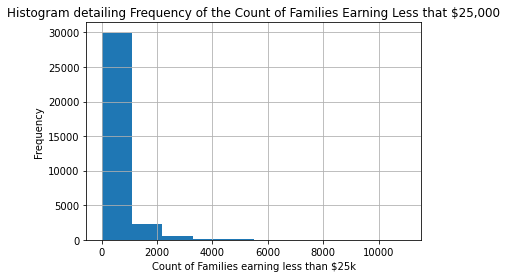

In [ ]:
# Distribution of the Target Variable 
econ['families_income_<25000'].hist(bins = 10) # the target variable is not balanced 
plt.xlabel('Count of Families earning less than $25k') #labelling x axis
plt.ylabel('Frequency') #labelling y axis
plt.title('Histogram detailing Frequency of the Count of Families Earning Less that $25,000') #giving it a title
plt.show()

# There are more than 29K zipcodes which has a count of less than 1000 families_earning_less_than_$25k

###Analysis Graph 1##

The histogram above is right skewed which tells us that the mode is higher than the median which is higher than the mean. The number of zipcodes which house families who make under 25,000 dollars is recorded by the y axis and the number of families in each zip code is documented on the x axis. The most interesting detail shown by this visual is that there are almost 30,000 zipcodes with less than 1,000 families earning under 25,000 dollars. Additionally, as the number of families earning less than 25,000 dollars, the number of zip codes that count decreases dramatically. The next largest finding is that about 2,500 zipcodes host more than 2,000 families earning less than 25,000 dollars. The more we can identify where these areas with the highest need are located, the more effective our government welfare programs will be.

##Table 1##
*Question: Are there any trends broken down by region that we can see in the final data set?*

**Method for Solution: Use a describe table grouped by region to calculate means which will help identify any noticeable or interesting patterns.**


In [ ]:
#Let's see if we can find any interesting trends when grouping by region
df_final.groupby('Region').describe() # grouping the dataset by Region and then finding its basic statistics value

sex_and_age-population-total_population                              \
                                            count          mean           std   
Region                                                                          
Midwest                                    9983.0   6778.863869  11109.710983   
Northeast                                  6015.0   9320.932170  13852.353137   
South                                     11286.0  10610.548379  14321.823123   
West                                       5682.0  13206.170539  18151.379416   

                                                    \
           min     25%     50%       75%       max   
Region                                               
Midwest    0.0  573.00  1784.0   7208.00  115104.0   
Northeast  0.0  858.50  3357.0  12034.50  112982.0   
South      0.0  961.00  3805.5  15469.50  113255.0   
West       0.0  519.25  3125.0  22743.75  106360.0   

          sex_and_age-population-male_total_population               \
                                                 count         mean   
Region                                                                
Midwest                                         9983.0  3342.320445   
Northeast                                       6015.0  4539.976559   
South                                          11286.0  5199.561758   
West                                            5682.0  6580.190074   

                                                                \
                   std  min     25%     50%       75%      max   
Region                                                           
Midwest    5440.100561  0.0  292.00   903.0   3597.50  55867.0   
Northeast  6681.608334  0.0  433.50  1666.0   5918.00  60490.0   
South      6972.720578  0.0  476.00  1919.0   7609.75  55192.0   
West       9018.411962  0.0  266.25  1596.5  11358.50  52846.0   

          sex_and_age-population-female_total_population               \
                                                   count         mean   
Region                                                                  
Midwest                                           9983.0  3436.543424   
Northeast                                         6015.0  4780.955611   
South                                            11286.0  5410.986621   
West                                              5682.0  6625.980465   

                                                                \
                   std  min     25%     50%       75%      max   
Region                                                           
Midwest    5682.304601  0.0  278.00   877.0   3607.50  59237.0   
Northeast  7189.713295  0.0  424.00  1683.0   6165.00  56111.0   
South      7370.428972  0.0  475.00  1884.5   7891.75  58280.0   
West       9154.135675  0.0  245.25  1520.5  11346.50  53514.0   

          sex_and_age-population-male_18_years_and_over_population  \
                                                             count   
Region                                                               
Midwest                                               9983.0         
Northeast                                             6015.0         
South                                                11286.0         
West                                                  5682.0         

                                                                            \
                  mean          std  min     25%     50%      75%      max   
Region                                                                       
Midwest    2537.456376  4121.737266  0.0  224.00   689.0  2715.00  38706.0   
Northeast  3522.838736  5124.544660  0.0  346.50  1336.0  4565.00  44746.0   
South      3929.229045  5183.726589  0.0  370.25  1473.0  5771.75  38377.0   
West       4975.734952  6745.695904  0.0  212.00  1200.5  8666.00  40605.0   

          sex_and_age-population-female_18_years_and_over_population  \
                 

###Analysis of Table 1##

Largest total population is in the West, then South, then Northeast, and finally Midwest. Higher population of females in every region, largest gap between males and females is the Northeast. Highest one race white population is in the West, highest one race black population is in the South, highest one race american indian and alaska native is in the West, highest one race asian population is in the West, highest one race native hawaiian and other pacific islander population is in the West, and hispanic or latino is also highest in the West. This most likely has to do with the largest population in the west so it may be interesting to look deeper into thos numbers and keep that in mind as we identify which areas have the lowest income.

Additionally, the states that have the highest employment and unemployment numbers are located in the West and lowest in the Midwest as well as highest unemployed are in the West. The highest populations commuting to work via public transportation are in the Northeast, which may be a result of some of the most effective low cost systems already in place. The highest number of workers who walk to work are also in the Northeast.

*One very interesting finding is although the population sizes are so drastically different between the West and the South, there is an extremely small difference between the numbers of families making less than 25,000 dollars that is not proportional at all to the population difference. There are also more grandparents on average taking care of grandchildren in the South.*

Other interesting takeaways include more high school or equivalents in the South. Most everything else follow suit with the population rankings.



##Table 2 

Understanding the different race in all four regions in the U.S

In [ ]:
df_race = df_final.groupby('Region').mean() #grouped the data by region and took a mean of it
df_race[['race-population-one_race_white_total_population','race-population-one_race_black_total_population','race-population-one_race_asian_total_population']] # choosen only three variables that is white race, black and asians. 

race-population-one_race_white_total_population  \
Region                                                       
Midwest                                        5511.361715   
Northeast                                      6850.930507   
South                                          7559.925306   
West                                           9166.359908   

           race-population-one_race_black_total_population  \
Region                                                       
Midwest                                         701.802765   
Northeast                                      1107.737323   
South                                          2045.179426   
West                                            613.743928   

           race-population-one_race_asian_total_population  
Region                                                      
Midwest                                         199.813283  
Northeast                                       577.800166  
South                                           334.997076  
West                                           1295.759064

### Analysis of Table 2##

On an avergage, White population is highest in West, Black population is highest in South and Asian population is highest in West as well. 

## Table 3##

Understanding the Count of Graduate Education level State wise 

In [ ]:
df_education =df_final.groupby('state_name').sum() #grouping data by state name and then taking a count
df_education[['educational_attainment-population-graduate_or_professional_degree_population_25_years_and_over']] #understanding the count of graduates in each state 

educational_attainment-population-graduate_or_professional_degree_population_25_years_and_over
state_name                                                                                                          
Alabama                                                          290686                                             
Alaska                                                            48950                                             
Arizona                                                          463799                                             
Arkansas                                                         150874                                             
California                                                      3040406                                             
Colorado                                                         514777                                             
Connecticut                                                      413949                                             
Delaware                                                          79551                                             
District of Columbia                                             148064                                             
Florida                                                         1415419                                             
Georgia                                                          729398                                             
Hawaii                                                           103489                                             
Idaho                                                             87583                                             
Illinois                                                        1090609                                             
Indiana                                                          386076                                             
Iowa                                                             179792                                             
Kansas                                                           213417                                             
Kentucky                                                         277290                                             
Louisiana                                                        242071                                             
Maine                                                            100128                                             
Maryland                                                         717979                                             
Massachusetts                                                    844686                                             
Michigan                                                         714101                                             
Minnesota                                                        419646                                             
Mississippi                                                      154276                                             
Missouri                                                         423817                                             
Montana                                                           68137                                             
Nebraska                                                         121503                                             
Nevada                                                           151986                                             
New Hampshire                                                    124619                                             
New Jersey                                                       878062                                             
New Mexico                                                       159952                                             
New York                                    

### Analysis of Table 3
We can see that California, Texas, and New York has the highest count of grduates. And Wyoming, North Dakota, Alaska and  has the lowest number of graduates. Graduate counts is also one of the most important variable in predicting income level of families. 

## Graph 2##

Understanding the Count of families earning less than $25K in all the states. 

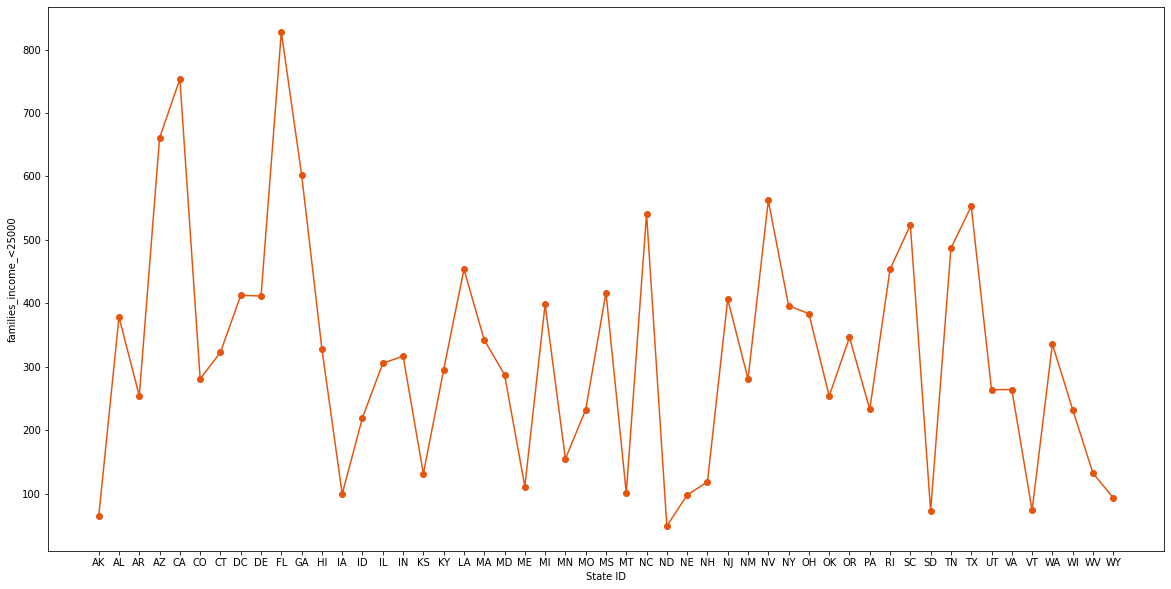

In [ ]:
plt.figure(figsize=(20,10)) # specifying the size of the plot
tmp = df_final.groupby('state_id').mean()
plt.plot(tmp['families_income_<25000'],color = '#e6550d',marker='o') # plotted a line chart
plt.title('') # title of the graph
plt.xlabel('State ID') # labelling x asis
plt.ylabel('families_income_<25000') # labelling y axis
plt.show() # looks the graph clean

### Analysis of Graph 2##

The line graph shows that highest average of families count with income less than $25K is in Florida and lowest is in North Dokta

## Table 4##

*Question: How many does age population differ across each region?

**Method for Solution: Run Table Grouped by Age Group and Region **

In [ ]:
tmp2 = df_final.groupby(['Region']).quantile([0.25,0.5,0.75,0.95]) #grouping the data region and finding out quantiles
tmp2.loc[:,('Age_0-14',
 'Age_15-24',
 'Age_25-44',
 'Age_45-64',
 'Age_65-95')] # selected age variables to understand age population in all regions


Age_0-14  Age_15-24  Age_25-44  Age_45-64  Age_65-95
Region                                                              
Midwest   0.25    101.50      60.00     119.00     167.00     103.00
          0.50    333.00     208.00     384.00     516.00     315.00
          0.75   1329.50     905.00    1657.50    1984.00    1139.00
          0.95   6183.20    4360.50    8289.80    8268.90    4495.90
Northeast 0.25    120.00      93.00     172.00     265.00     158.00
          0.50    544.00     391.00     716.00    1037.00     569.00
          0.75   2032.00    1523.50    2780.50    3491.50    1903.50
          0.95   6730.50    5458.30   10327.40   10229.80    5685.90
South     0.25    153.00     112.00     201.00     264.00     158.00
          0.50    672.00     478.00     871.00    1067.00     620.00
          0.75   2847.75    1933.00    3825.50    4029.25    2222.75
          0.95   8429.50    5925.00   11710.75   10508.50    5744.75
West      0.25     78.00      49.25      97.00     144.25      87.00
          0.50    544.00     374.00     666.50     831.50     501.00
          0.75   4023.75    2808.25    5948.00    5799.00    2989.50
          0.95  10869.15    7698.00   14663.35   12628.90    6784.85

###Analysis of Table 4##
In this table we can see that there are less people in midwest. Additionally, the northeast and west has the similar number of young people but Northeast has more old people.


For 95% of the data, this table shows that the largest population in every region is Age 25-44. And the lowest is 65+ in the West and South while its 15-24 in the Midwest and Northeast regions.

## Graph 3##

**Question: How does lack of healthcare compare by region**

*Method for Solution: Run the distribution for healthcare by region then state*

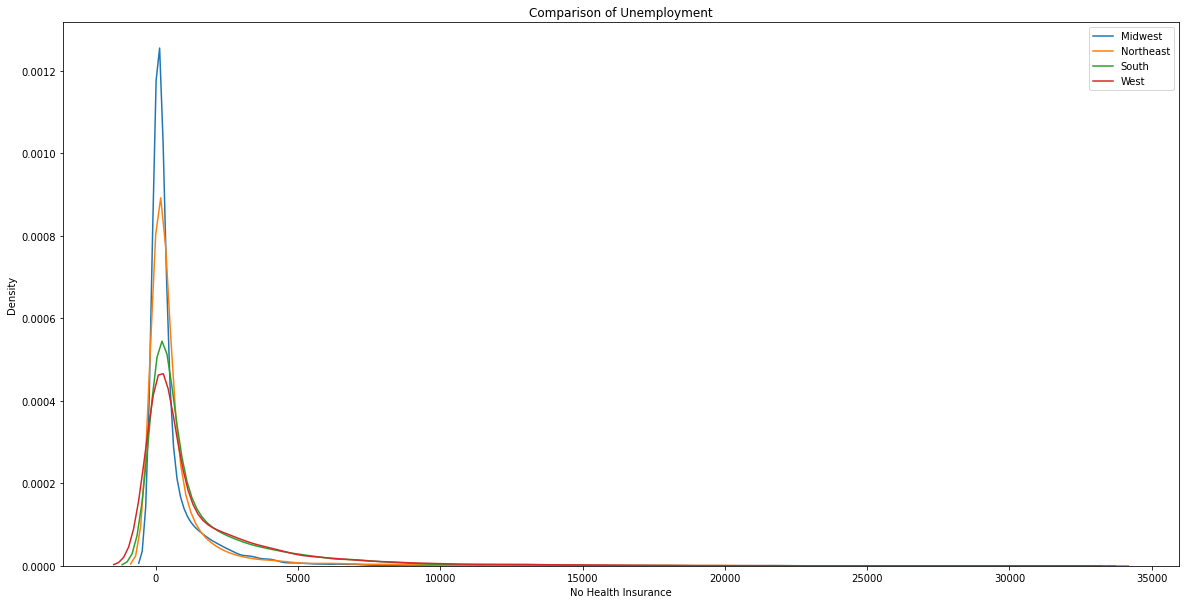

In [ ]:
import seaborn as sns
# let's try regions
plt.figure(figsize = (20,10)) # specifying the size of the plot
# making a density plot for each region
sns.kdeplot(df_final['health_insurance_coverage-population-no_health_insurance_civilian_noninstitutionalized_population'][df_final.Region == "Midwest"],label='Midwest')
sns.kdeplot(df_final['health_insurance_coverage-population-no_health_insurance_civilian_noninstitutionalized_population'][df_final.Region == "Northeast"],label='Northeast')
sns.kdeplot(df_final['health_insurance_coverage-population-no_health_insurance_civilian_noninstitutionalized_population'][df_final.Region == "South"],label='South')
sns.kdeplot(df_final['health_insurance_coverage-population-no_health_insurance_civilian_noninstitutionalized_population'][df_final.Region == "West"],label='West')
plt.title('Comparison of Unemployment') # giving it a title
plt.xlabel('No Health Insurance') # labelling the x axis
plt.ylabel('Density') # labelling the y axis
plt.legend() # making legends
plt.show() # makes the graph looks clean

###Analysis of Graph 3##

The chart above shows that the South and the West don't have quite as dense counts of civilians without health insurance as the Northeast and Midwest. With that said, they (South and West) do have more areas with higher counts of civilians without health insurance.

##Table 5 

Understanding the count of population region wise in different occupation such as management, sales jobs, production etc. 

In [ ]:
df_occupation = df_final.groupby('Region') # group the data by region
df_occupation[['occupation-population-management_business_science_and_arts_occupations_civilian_employed_population_16_years_and_over'                                    
,'occupation-population-service_occupations_civilian_employed_population_16_years_and_over'                                            
,'occupation-population-sales_and_office_occupations_civilian_employed_population_16_years_and_over'                        
,'occupation-population-natural_resources_construction_and_maintenance_occupations_civilian_employed_population_16_years_and_over' 
,'occupation-population-production_transportation_and_material_moving_occupations_civilian_employed_population_16_years_and_over']].agg([np.sum, np.mean, np.std]) 
#selected 4 variables out of the grouped data and taking its sum, mean and std. 

occupation-population-management_business_science_and_arts_occupations_civilian_employed_population_16_years_and_over  \
                                                                                                                            sum   
Region                                                                                                                            
Midwest                                             11653330                                                                      
Northeast                                           10880969                                                                      
South                                               19412116                                                                      
West                                                12801209                                                                      

                                     \
                  mean          std   
Region                                
Midwest    1167.317440  2242.690419   
Northeast  1808.972402  2891.179628   
South      1720.017367  2897.449988   
West       2252.940690  3433.570715   

          occupation-population-service_occupations_civilian_employed_population_16_years_and_over  \
                                                                                               sum   
Region                                                                                               
Midwest                                              5608355                                         
Northeast                                            5000625                                         
South                                                9661200                                         
West                                                 6493235                                         

                                     \
                  mean          std   
Region                                
Midwest     561.790544   994.018016   
Northeast   831.359102  1490.949580   
South       856.034024  1277.283334   
West       1142.772791  1748.562731   

          occupation-population-sales_and_office_occupations_civilian_employed_population_16_years_and_over  \
                                                                                                        sum   
Region                                                                                                        
Midwest                                              7655352                                                  
Northeast                                            6385024                                                  
South                                               13086538                                                  
West                                                 8153546                                                  

                                     \
                  mean          std   
Region                                
Midwest     766.838826  1335.572884   
Northeast  1061.516874  1571.120269   
South      1159.537303  1738.888143   
West       1434.978177  2087.168550   

          occupation-population-natural_resources_construction_and_maintenance_occupations_civilian_employed_population_16_years_and_over  \
                                                                                                                                      sum   
Region                                                                                                                                      
Midwest                                              2680330                                                                                
Northeast                                            2050676                                                                                
South                                                5209065            

### Analysis of Table 5##

Highest Population in Management, Science and Arts is in South Region. We have highest population in Service occupation in South Region as well. 

##Graph 4##

Understanding the Rural Popualtion region wise. 



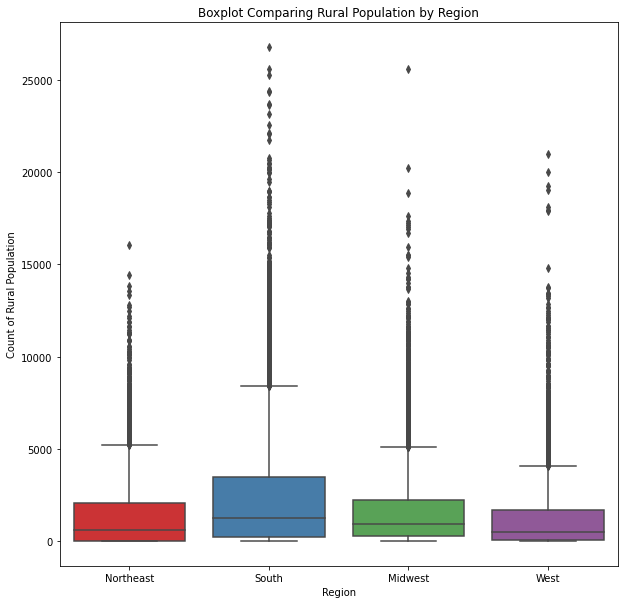

In [ ]:
# boxplot of Rural Population
plt.figure(figsize=(10,10)) # specifying the size of the plot
sns.boxplot(x='Region', y="urban_rural-population-rural_total_population", data=df_final, palette="Set1") # plotting a boxplot with x and y variables
plt.title("Boxplot Comparing Rural Population by Region") # giving it a title
plt.xlabel("Region") # defining the x label
plt.ylabel("Count of Rural Population") # defining the y label 
plt.show() # making the plot looks clean



###Analysis of Graph 4##

This shows that South has highest count of rural population and West has the lowest rural population. 

## Graph 5##

Plotting a scatterplot to understand the relationship of unemployement with the target variable (Count of Familes with incomes < $25K )

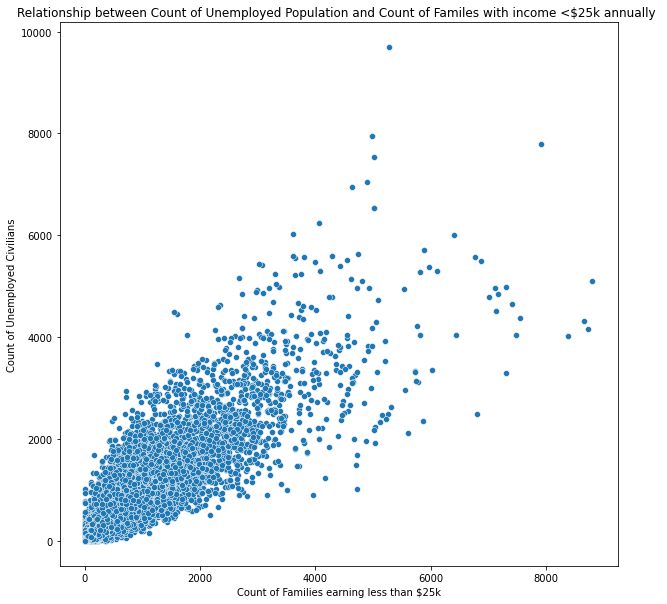

In [ ]:
# Scatterplot
plt.figure(figsize=(10,10)) #speciying the size of the figure
sns.scatterplot(data=df_final, x="families_income_<25000", y="employment_status-population-unemployed_population_16_years_and_over") #plotting a scatterplot
plt.ylabel("Count of Unemployed Civilians") #labelling axis
plt.xlabel("Count of Families earning less than $25k") #labelling x axis
plt.title("Relationship between Count of Unemployed Population and Count of Familes with income <$25k annually ") # giving it a title
plt.show() #makes the plot look clean 


###Analysis of Graph 5

As expected, the count of unemployed population has a linear relationship with the count of families earning under $25K annually. There are still some points which can be seen in the right side of the graph where unemployed count in not high but families count is greater than 6000

# Scaling the dataset & Splitting

In [ ]:
# standarization of the data is done so that all the data values are in the same scale 
# we would be applying it on the X Data and not the Y data that is target variable 
# we would be splitting our dataset first into train and test dataset and then apply minmax scaler

# target variable defined as Y
Y = df_final['families_income_<25000']
print(Y.shape)

(32966,)


In [ ]:
# apart from the target variable, everything else is X dataset so we dropped our target variable from the df_final dataset
X = df_final.drop('families_income_<25000',axis=1)
print(X.shape)

(32966, 228)


In [ ]:
# Variable Reduction through Correlation coefficient
# defining a function
#removing variables through correlation analysis - defining our function

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [ ]:
# dropping all the columns from X where coorelation is greater than or equal to 0.8
correlation(X,0.80)

In [ ]:
X.shape # new shape of the X dataset as most the highly correlated variables got dropped off

(32966, 88)

In [ ]:
# importing sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# made a list which has numeric columns only that is num_cols
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
str_cols = X.columns[X.dtypes.apply(lambda c: not np.issubdtype(c, np.number))]
str_cols 

Index(['zipcode', 'city', 'state_id', 'state_name', 'Region'], dtype='object')

In [ ]:
#splitting into train and test partitions 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 30)

In [ ]:
# checking the shape of all the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23076, 88) (9890, 88) (23076,) (9890,)


In [ ]:
# converting these all to numpy arrays
X_train = np.array(X_train[num_cols])
X_test = np.array(X_test[num_cols])
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_test.shape, X_train.shape # checking our work

((9890, 83), (23076, 83))

In [ ]:
#applying minmax scaler on the split data

scaler = MinMaxScaler() #importing the scaler
X_train = scaler.fit_transform(X_train) #applying minmax scaler to train dataset 
X_test = scaler.transform(X_test) # TRANSFORM/APPLY to the test data 

In [ ]:
X_train # checking the work

array([[6.87204615e-03, 2.17971773e-04, 3.03867720e-03, ...,
        0.00000000e+00, 8.06451613e-04, 2.68252336e-04],
       [8.07530581e-02, 1.30783064e-03, 2.17867422e-04, ...,
        0.00000000e+00, 1.88990182e-02, 2.05958182e-02],
       [2.69929803e-02, 3.32406953e-03, 1.26133771e-04, ...,
        0.00000000e+00, 4.20757363e-03, 2.08640706e-04],
       ...,
       [1.44243467e-01, 1.93994878e-02, 8.60002981e-04, ...,
        5.23560209e-02, 4.78611501e-02, 5.86876500e-02],
       [1.69055810e-01, 1.66203477e-02, 3.57761240e-03, ...,
        0.00000000e+00, 3.65357644e-02, 2.01934397e-02],
       [3.30049347e-02, 7.62901204e-04, 0.00000000e+00, ...,
        0.00000000e+00, 4.38288920e-03, 0.00000000e+00]])

In [ ]:
tmp_X_train = pd.DataFrame(X_train) # converting it into pd as naming as tmp file
tmp_X_train.describe() # checking the min and max of the dataset after applying minmax scaler

0             1             2             3             4   \
count  23076.000000  23076.000000  23076.000000  23076.000000  23076.000000   
mean       0.083958      0.016235      0.013974      0.006350      0.001047   
std        0.124330      0.036955      0.044283      0.027539      0.011386   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.006181      0.000218      0.000000      0.000000      0.000000   
50%        0.024291      0.002398      0.000344      0.000404      0.000000   
75%        0.113426      0.015748      0.006926      0.003717      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 5             6             7             8             9   \
count  23076.000000  23076.000000  23076.000000  23076.000000  23076.000000   
mean       0.000597      0.000812      0.000721      0.008397      0.005666   
std        0.009911      0.015873      0.013160      0.033954      0.028557   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000132      0.000000   
75%        0.000000      0.000000      0.000000      0.002697      0.000862   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 10            11            12            13            14  \
count  23076.000000  23076.000000  23076.000000  23076.000000  23076.000000   
mean       0.002619      0.002622      0.001765      0.003610      0.002936   
std        0.018377      0.016662      0.017961      0.022046      0.019798   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000495      0.000525      0.000000      0.000726      0.000059   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 15            16            17            18            19  \
count  23076.000000  23076.000000  23076.000000  23076.000000  23076.000000   
mean       0.004578      0.001016      0.001919      0.001448      0.001280   
std        0.021063      0.010926      0.015397      0.016735      0.015138   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.001019      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 20            21            22            23            24  \
count  23076.000000  23076.000000  23076.000000  23076.000000  23076.000000   
mean       0.008398      0.006453      0.009665      0.009856      0.011493   
std        0.037043      0.016529      0.025353      0.037126      0.046151   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000164      0.000418      0.001684      0.000000      0.000413   
75%        0.002790      0.005856      0.009431      0.000000      0.003707   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 25            26            27            28            29  \
count  23076.000000  23076.000000  23076.000000  23076.000000  23076.000000   
mean       0.008058      0.001496      0.007243      0.002288      0.006579   
std        0.041070      0.019937      0.030126      0.020077      0.037433   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000 

In [ ]:
tmp_X_test = pd.DataFrame(X_test) #converting it into pd as naming as tmp file
tmp_X_test.describe() # checking the min and max of the dataset after applying minmax scaler

0            1            2            3            4   \
count  9890.000000  9890.000000  9890.000000  9890.000000  9890.000000   
mean      0.083911     0.015852     0.014048     0.006407     0.000922   
std       0.123918     0.032875     0.044625     0.028946     0.006518   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.006307     0.000218     0.000000     0.000000     0.000000   
50%       0.023957     0.002343     0.000344     0.000323     0.000000   
75%       0.113452     0.015422     0.006757     0.003556     0.000000   
max       0.898075     0.575827     0.820420     0.882091     0.392946   

                5            6            7            8            9   \
count  9890.000000  9890.000000  9890.000000  9890.000000  9890.000000   
mean      0.000445     0.000994     0.000616     0.008198     0.005600   
std       0.004888     0.018177     0.008176     0.031534     0.026569   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000132     0.000000   
75%       0.000000     0.000000     0.000000     0.002593     0.000916   
max       0.315532     0.962589     0.301547     0.724758     0.901233   

                10           11           12           13           14  \
count  9890.000000  9890.000000  9890.000000  9890.000000  9890.000000   
mean      0.002513     0.002474     0.001443     0.003385     0.003423   
std       0.015322     0.015456     0.008945     0.018467     0.030868   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000474     0.000525     0.000000     0.000726     0.000059   
max       0.646152     0.681978     0.390506     0.762166     2.164519   

                15           16           17           18           19  \
count  9890.000000  9890.000000  9890.000000  9890.000000  9890.000000   
mean      0.004461     0.000824     0.001906     0.001156     0.001072   
std       0.019275     0.006126     0.013846     0.010700     0.009296   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000959     0.000000     0.000000     0.000000     0.000000   
max       0.558205     0.317990     0.460133     0.384866     0.343936   

                20           21           22           23           24  \
count  9890.000000  9890.000000  9890.000000  9890.000000  9890.000000   
mean      0.008307     0.006306     0.009533     0.010284     0.011773   
std       0.034671     0.014628     0.021742     0.038073     0.047698   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000164     0.000418     0.001684     0.000000     0.000408   
75%       0.002790     0.005773     0.009768     0.000000     0.003609   
max       0.714434     0.637915     0.625295     0.808687     0.943307   

                25           26           27           28           29  \
count  9890.000000  9890.000000  9890.000000  9890.000000  9890.000000   
mean      0.007499     0.001525     0.007131     0.002535     0.006343   
std       0.038157     0.021683     0.028325     0.025119     0.035903   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000205     0.000000     0.000000   
75%       0.002910     0.000215     0.002762     0.000077     0.001205   
max       1.159878     1.432029     0.642705     1.025435     0.977932   

              

#Model 1 

* This is a simple regression we would be applying in Model 1  
* In this model, we are taking all the num_cols in our X dataset

In [ ]:
# importing scikit learn as we'll need for regression modeling
from sklearn.linear_model import LinearRegression

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# LR is the variable in which we have stored the general model Linear Regression
LR = LinearRegression()
# fit the model - LR is now a 'model object'
LR = LR.fit(X_train, y_train) 

In [ ]:
# storing the predictions as train_preds and test_preds
train_preds = LR.predict(X_train) # 32996 rows, 1 column... same dimensionality as y_train
test_preds = LR.predict(X_test)  # 32996 rows, 1 column... same dimensionality as y_test

## Evaluate the Model

We would be evaluating our Regression Model on 4 metrics. 

* R2 Score
* Mean Absolute Error
* Mean Squared Error
* Bias Error

##R2

In [ ]:
# 1) R2 value - showing the coefficient of determination 

print("This is train R2:", r2_score(y_train, train_preds)) # train
print("This is test R2:", r2_score(y_test, test_preds)) # test

# values will be between 0 and 1 and the bigger the value, better it is. 
# R2 has slightly decreased in test data

This is train R2: 0.9542451481537748
This is test R2: 0.9498218291089181


##Mean Absolute Error 

In [ ]:
# 2) MAE
trainMAE = mean_absolute_error(y_train, train_preds) # MAE for train data
print("This is trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds) # MAE for test data
print("This is testMAE:", testMAE) # test

# values between 0 and +Inf
# values closer to 0 are better

# In this case, test MAE is slightly less in test data which is good

This is trainMAE: 70.33329077680652
This is testMAE: 69.97620618900265


## Mean Squared Error

In [ ]:
# 3) MSE
trainMSE = mean_squared_error(y_train, train_preds) #calculating MSE for train
print("This is trainMSE:", trainMSE) #train
testMSE = mean_squared_error(y_test, test_preds) #calculating MSE for test 
print("This is testMSE:", testMSE) #test

# values between 0 and +Inf
# values closer to 0 are better

# Test data has a higher MSE as compared to train data set that means is not performing better for test data 

This is trainMSE: 18595.854036565168
This is testMSE: 19631.72526533337


##Bias Error

In [ ]:
# 4) Bias Error (Actual, pred) # defining a function to calculate Bias error as it is not an in-built function
def mean_error(y, y_pred):
    # assuming y and y_pred are numpy arrays
    return np.mean(y_pred - y)

In [ ]:
mean_error(y_train,train_preds) # Bias error on train data

0.00026287086015429583

In [ ]:
mean_error(y_test,test_preds) #Bias error on test data, test has a higher Bias error than train

0.6312926276877289

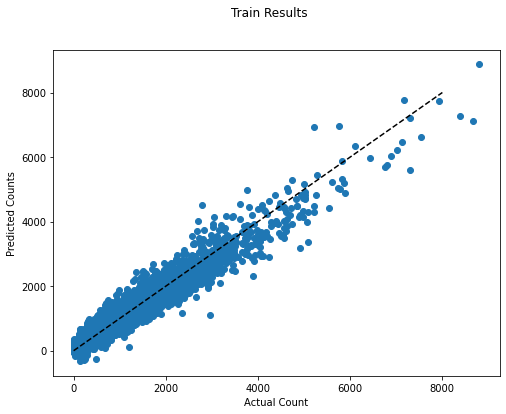

In [ ]:
# Scatterplot for train results - checking how does it fit on the line

plt.figure(figsize=(8, 6)) # defining the size of the plot
plt.scatter(x=y_train, y=train_preds) # x axis is actual and y axis is predictions
plt.plot([0, 8000], [0, 8000], '--k') # plotting a 45 degree line
plt.axis('tight') 
plt.xlabel('Actual Count') # actual
plt.ylabel('Predicted Counts') #predicted 
plt.suptitle('Train Results') # title of graph
plt.show() # makes a clean plot

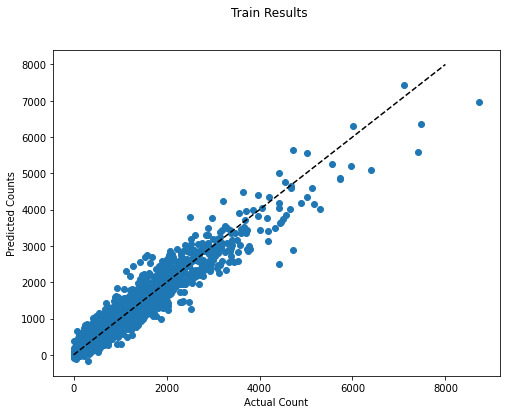

In [ ]:
# Scatterplot for test results - checking how does it fit on the line

plt.figure(figsize=(8, 6)) # defining the size of the plot
plt.scatter(x=y_test, y=test_preds) # x axis is actual and y axis is predictions
plt.plot([0, 8000], [0, 8000], '--k') # plotting a 45 degree line
plt.axis('tight') 
plt.xlabel('Actual Count') # actual
plt.ylabel('Predicted Counts') #predicted 
plt.suptitle('Train Results') # title of graph
plt.show() # makes a clean plot


# On the basis of the scatterplots, it can be seen that model is performing slightly better on train data as compared to test data

#Model 2 

* In this model, we would be using L1 that is Lasso Regression. 

* We would be using the already splitted dataset X_train, y_train, X_test, y_test

* We would be definign alpha value which is the penalty parameter we need to select 

In [ ]:
# Importing LASSO
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
#checking the shape of all the datasets
print(X_train.shape, X_test.shape, y_train.shape)

(23076, 83) (9890, 83) (23076,)


In [ ]:
X_train #checking X_train

array([[6.87204615e-03, 2.17971773e-04, 3.03867720e-03, ...,
        0.00000000e+00, 8.06451613e-04, 2.68252336e-04],
       [8.07530581e-02, 1.30783064e-03, 2.17867422e-04, ...,
        0.00000000e+00, 1.88990182e-02, 2.05958182e-02],
       [2.69929803e-02, 3.32406953e-03, 1.26133771e-04, ...,
        0.00000000e+00, 4.20757363e-03, 2.08640706e-04],
       ...,
       [1.44243467e-01, 1.93994878e-02, 8.60002981e-04, ...,
        5.23560209e-02, 4.78611501e-02, 5.86876500e-02],
       [1.69055810e-01, 1.66203477e-02, 3.57761240e-03, ...,
        0.00000000e+00, 3.65357644e-02, 2.01934397e-02],
       [3.30049347e-02, 7.62901204e-04, 0.00000000e+00, ...,
        0.00000000e+00, 4.38288920e-03, 0.00000000e+00]])

In [ ]:
X_test # checking X_test

array([[1.28579372e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.75315568e-04, 0.00000000e+00],
       [3.75399639e-02, 2.07073184e-03, 5.68748638e-03, ...,
        4.18848168e-02, 3.40112202e-03, 1.62441692e-03],
       [3.57407214e-01, 9.66159882e-02, 1.11502253e-01, ...,
        8.63874346e-02, 9.69495091e-02, 8.82550186e-02],
       ...,
       [4.24155546e-01, 3.54749060e-02, 8.50829616e-03, ...,
        1.49214660e-01, 1.01788219e-01, 7.90897304e-02],
       [1.58795524e-01, 3.95618767e-02, 7.26759853e-02, ...,
        6.02094241e-02, 4.13043478e-02, 6.16235227e-02],
       [2.17021129e-02, 3.86899896e-03, 0.00000000e+00, ...,
        0.00000000e+00, 6.31136045e-04, 3.72572689e-04]])

In [ ]:
# Simple Regression to check coefficients 
lr = LinearRegression() # defining the variable
lr.fit(X_train, y_train) #fit model
lr.coef_ # these are the coefficients of the 83 variables which we have input into the model

array([ 4.24848786e+03, -5.34779160e+02,  1.20709817e+03, -4.28870163e+01,
        1.04892989e+02, -9.03825924e+01,  1.02919200e+02, -1.39647753e+02,
       -2.36989532e+15,  7.28043447e+14,  1.82004981e+15,  1.26922411e+15,
        5.57530175e+14,  4.85819719e+14,  6.63233505e+14,  6.54411825e+14,
        6.12068182e+02, -2.16556111e+02, -4.98575977e+02, -4.33546662e+02,
        1.99668789e+02,  1.14826846e+01,  1.26509200e+02, -7.12639702e+01,
        9.22139758e+02,  6.46853518e+02,  1.33208064e+03,  7.44094786e+02,
       -1.90466387e+02, -5.48287023e+02,  9.59078567e+01, -1.38565564e+02,
       -3.35977612e+01, -8.57781250e+02, -8.43687500e+02, -5.89000000e+02,
        8.01250000e+01,  1.52031250e+03, -1.53500000e+02,  3.46625000e+02,
        4.38921875e+02, -2.49937500e+02,  4.18750000e+02, -7.18750000e+00,
        4.82125000e+02, -7.69746094e+01,  1.36359375e+02, -4.80546875e+01,
       -2.94343750e+02, -1.93750000e+00,  2.83125000e+01,  1.49625000e+02,
        1.13187500e+02,  

##$\alpha=0.01$

In [ ]:
model_lasso = Lasso(alpha = 0.01) # defining variable
model_lasso.fit(X_train,y_train) #fitting the model

train_pred_lasso = model_lasso.predict(X_train) #predicting y on the basis of train data
print(r2_score(y_train,train_pred_lasso))

test_pred_lasso = model_lasso.predict(X_test) #predicting y on the basis on test data
print(r2_score(y_test, test_pred_lasso))


0.9541671987709314
0.9498693066349839


In [ ]:
model_lasso.coef_ # these are the coefficients of the variables in this model

array([ 4.10513120e+03, -3.94489556e+02,  1.19088565e+03, -0.00000000e+00,
        7.53436003e+00, -9.98873538e+00,  3.01853695e+01, -1.00547079e+02,
       -0.00000000e+00, -4.81583539e+02,  1.11903917e+03, -9.92182325e+02,
       -4.77308555e+01,  1.91354393e+02, -4.74245676e+02,  5.06608750e+02,
        0.00000000e+00, -1.52301325e+02, -3.47589107e+02, -1.99402789e+02,
        1.92969571e+02, -2.01478543e+01,  4.34343185e+01, -6.83142872e+01,
        8.63060198e+02,  6.38644614e+02,  1.22791675e+03,  6.59395956e+02,
       -1.40388027e+02, -5.09018089e+02,  1.47738914e+00, -1.29675654e+02,
       -1.66354691e+01, -8.11637879e+02, -8.44553935e+02, -5.91504864e+02,
        7.40016943e+01,  1.53198825e+03, -2.02511401e+02,  3.53395323e+02,
        4.37565599e+02, -2.35651131e+02,  3.69613483e+02,  0.00000000e+00,
        4.86835448e+02, -6.69773892e+01,  1.22839836e+02, -8.80499610e+00,
       -2.68098135e+02, -0.00000000e+00,  0.00000000e+00,  1.44604759e+02,
        9.98563259e+01,  

##$\alpha=1$

In [ ]:
# trying with alpha=1
model_lasso1 = Lasso(alpha = 1) # defining variable
model_lasso1.fit(X_train,y_train) #fitting the model

train_pred_lasso1 = model_lasso1.predict(X_train) #predicting y on the basis of train data
print(r2_score(y_train,train_pred_lasso1))

test_pred_lasso1 = model_lasso1.predict(X_test) #predicting y on the basis on test data
#print(np.sqrt(mean_squared_error(y_test,test_pred_lasso1))) 
print(r2_score(y_test, test_pred_lasso1))

0.9299940097261652
0.9260027149781721


In [ ]:
model_lasso1.coef_ #checking the coefficients 

array([ 7.84524109e+02, -0.00000000e+00,  6.58374261e+02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        8.90479967e+02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.18914533e+01,  1.40564359e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -7.66725016e+01,
        0.00000000e+00,  2.21818265e+03, -6.44922088e+02,  8.92968232e+02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.06268605e+02,
        2.19111343e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

##$\alpha=10$

In [ ]:
model_lasso10 = Lasso(alpha = 10) # defining variable
model_lasso10.fit(X_train,y_train) #fitting the model

train_pred_lasso10 = model_lasso10.predict(X_train) #predicting y on the basis of train data
print(r2_score(y_train,train_pred_lasso10))

test_pred_lasso10 = model_lasso10.predict(X_test) #predicting y on the basis on test data
#print(np.sqrt(mean_squared_error(y_test,test_pred_lasso1))) 
print(r2_score(y_test, test_pred_lasso10))


0.7569748329645896
0.7567145014594855


In [ ]:
model_lasso10.coef_ #checking the coefficient as they most of them have become zero

array([2416.11694764,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,   -0.        ,    0.        ,    0.        ,
         -0.        ,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  328.67011016,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   -0.        ,    0.     

##$\alpha=100$

In [ ]:
model_lasso100 = Lasso(alpha = 100) # defining variable
model_lasso100.fit(X_train,y_train) #fitting the model

train_pred_lasso100 = model_lasso100.predict(X_train) #predicting y on the basis of train data
print(r2_score(y_train,train_pred_lasso100))

test_pred_lasso100 = model_lasso100.predict(X_test) #predicting y on the basis on test data
#print(np.sqrt(mean_squared_error(y_test,test_pred_lasso1))) 
print(r2_score(y_test, test_pred_lasso100))

0.0
-4.9764125230167267e-05


In [ ]:
model_lasso100.coef_ #all have become zero now

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##Cross Validation 
(Cross validation is done to find the optimal value of alpha)

In [ ]:
# using cross validation to find the optimal value of alpha for Lasso
# we trying on train data 

lassocv = LassoCV(alphas=[0.001, 0.01, 1,2,5,10,100,1000,10000,1000000])
lassocv.fit(X_train, y_train)
optimal = lassocv.alpha_

print("In the above 10 alpha values," ,optimal, "is the optimal") 

# 0.01 is the optimal value which we finalize for the model. 

In the above 10 alpha values, 0.01 is the optimal


##Evaluate the Model with alpha = 0.01 

* We are calculating evaluation metrics for the Lasso model with alpha = 0.01 as it is our optimal value. 

##R2

In [ ]:
# R2 score train dataset
train_pred_lasso = model_lasso.predict(X_train) #predicting y on the basis of train data
print('This is R2 for Lasso Model Train',r2_score(y_train,train_pred_lasso))

#lassocv.fit(X_test, y_test), R2 score for test dataset 
test_pred_lasso = model_lasso.predict(X_test) #predicting y on the basis on test data
print('This is R2 for Lasso Model Test',r2_score(y_test, test_pred_lasso))

This is R2 for Lasso Model Train 0.9541671987709314
This is R2 for Lasso Model Test 0.9498693066349839


##Mean Absolute Error

In [ ]:
#Calculating MAE

Lasso_trainMAE = mean_absolute_error(y_train, train_pred_lasso) # MAE for train data
print("This is Lasso Model trainMAE:", Lasso_trainMAE) # train
Lasso_testMAE = mean_absolute_error(y_test, test_pred_lasso) # MAE for test data
print("This is Lasso Model testMAE:", Lasso_testMAE) # test

This is Lasso Model trainMAE: 70.31828275574891
This is Lasso Model testMAE: 69.94823280535216


##Mean Squared Error

In [ ]:
# Calculating MSE
Lasso_trainMSE = mean_squared_error(y_train,train_pred_lasso)
print('This is Lasso Model MSE for train ', Lasso_trainMSE)
Lasso_testMSE = mean_squared_error(y_test,test_pred_lasso)
print('This is Lasso Model MSE for test',Lasso_testMSE) 

# The MSE closer to zero is better. Here, we can see our MSE is slightly higher for test dataset as compared to train dataset

This is Lasso Model MSE for train  18627.534509500983
This is Lasso Model MSE for test 19613.150141301314


##Bias Error

In [ ]:
print('Bias Error for Lasso Model Train dataset', mean_error(y_train,train_pred_lasso))
print('Bias Error for Lasso Model Test dataset', mean_error(y_test,test_pred_lasso))

Bias Error for Lasso Model Train dataset -5.573000122668229e-14
Bias Error for Lasso Model Test dataset 0.6459616684957415


## Comparing Simple Regression and Lasso (0.01)

* Both models are providing more or less the same results
* In terms of R2, Lasso has a slighly higher R2 for test data as compared to Simple Regression
* In terms of MAE, Lasso is better for test data with a very small difference
* In terms of MSE, Lasso is giving better results for test data as it is 19613 for lasso and 19631 for simple regression. Closer to zero is better performing model. 

So, overall Lasso is performing better than Simple Regression

# Comparing Coefficients Magnitude of Models 

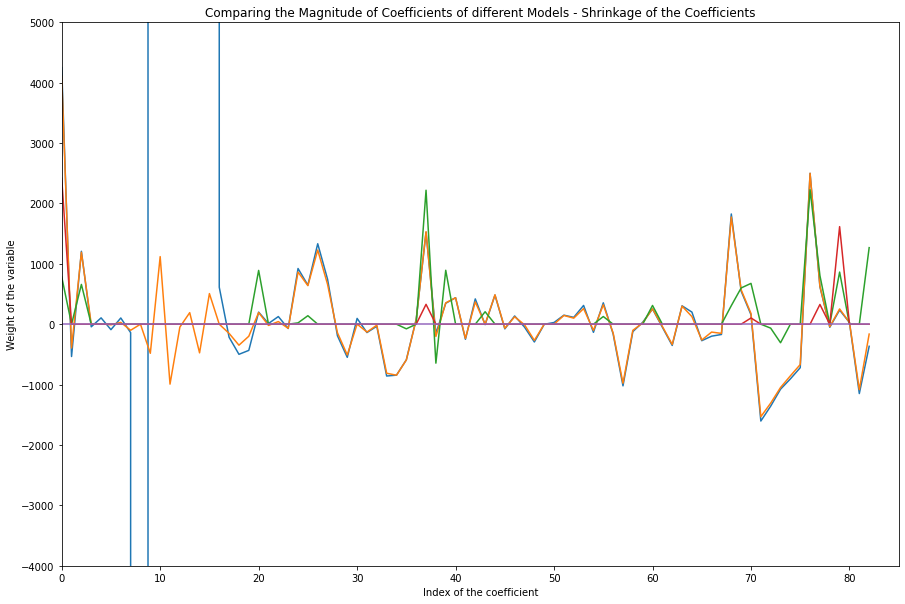

In [ ]:
from pylab import *
import pylab as plt
plt.figure(figsize=(15,10))
plot(lr.coef_) #blue line for simple regression
plot(model_lasso.coef_) #yellow line for lasso with penalty as 0.01
plot(model_lasso1.coef_) #green line for lasso with penalty as 1
plot(model_lasso10.coef_) # red line for lasso with penalty for 10
plot(model_lasso100.coef_) #purple line for lasso with penalty for 100
plt.xlabel('Index of the coefficient')
plt.ylabel('Weight of the variable')
plt.xlim(0,85)
plt.ylim(-4000,5000)
plt.title('Comparing the Magnitude of Coefficients of different Models - Shrinkage of the Coefficients')

plt.show()


# Analysis - As the penalty keeps increasing the coefficients value become closer to zero.
# Purple line where alpha is 100, all the coefficients are zero. Our Optimal Lasso Regression is where alpha value is 0.01 that is model_lasso

#Conclusion

* In this project, I have used us census data (demographic, social, housing, economic and Rural-Urban Datasets) and have taken 230 variables out of 800 variables and tried to predict the count of families who earn less than $25K for each zip code. 
* First, I dropped off the variables from each five datasets and made a final dataset called df_final. Then I kept our target variable in another dataset called Y and rest of the variables in X dataset. I also dropped off the variables which has a correlation coefficient of 0.8 or greater than that. 

* Then, I partitoned the data into X train, X test, y_train and y_test in a ratio of 70-30 where train is 70% and test is 30%. Then I applied minmax scaler on X_train and X_test so that all the values are in the scale of 0-1 

* Then I applied Simple Regression to predict our target variable. I evaluated our model using 4 metrics and then tried Lasso Regression to get a better model. I compared both the models and found that both models are more or less performing the same. I did not calculate MAPE as we had zero values in our dataset and the result of MAPE was showing as infinite. 

* Through, this model I have predicted the no. of familes who earn less than $25k. This model will be helpful to the government organizations, service centers or NGO who wants to find the area or zipcodes where they have more needy to support. And they can assist such people to uplift.  